In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define input and output

In [4]:
data= pd.read_csv('credit_risk_dataset.csv', index_col = [0])
data

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


# Transform data

- relabel values of cb_person_default_on_file variable

In [5]:
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map(lambda x: 1 if x=='Y' else 0).astype('category')

- numerize values of loan_grade variable

In [6]:
data['loan_grade'] = data['loan_grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}).astype('category')

In [7]:
data

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3
21,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
25,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
23,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
24,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,2,5800,13.16,0,0.11,0,30
54,120000,MORTGAGE,4.0,PERSONAL,0,17625,7.49,0,0.15,0,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,1,35000,10.99,1,0.46,0,28


In [8]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

- numerize values of person_home_ownership

In [9]:
data['person_home_ownership'] = data['person_home_ownership'].map({'OTHER':0, 'OWN':1, 'MORTGAGE':2, 'RENT':3}).astype('category')

In [10]:
data

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,3,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3
21,9600,1,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
25,9600,2,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
23,65500,3,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
24,54400,3,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,2,1.0,PERSONAL,2,5800,13.16,0,0.11,0,30
54,120000,2,4.0,PERSONAL,0,17625,7.49,0,0.15,0,19
65,76000,3,3.0,HOMEIMPROVEMENT,1,35000,10.99,1,0.46,0,28


- one hot encoder for person_home_ownership

In [46]:
data_encoder = pd.get_dummies(data, columns=['loan_intent'], prefix='int')
data_encoder.reset_index(inplace=True)

In [49]:
data_encoder.select_dtypes(exclude='object').columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'int_DEBTCONSOLIDATION', 'int_EDUCATION',
       'int_HOMEIMPROVEMENT', 'int_MEDICAL', 'int_PERSONAL', 'int_VENTURE',
       'person_income_log', 'person_age_log', 'person_emp_length_log',
       'loan_amount_log', 'loan_percent_income_log',
       'cb_person_cred_hist_length_log'],
      dtype='object')

- Log scale for numeric variables except loan interesting rate

In [50]:
data_encoder['person_income_log'] = np.log(data_encoder['person_income'])
data_encoder['person_age_log'] = np.log(data_encoder['person_age'])
data_encoder['person_emp_length_log'] = np.log(data_encoder['person_emp_length'])
data_encoder['loan_amount_log'] = np.log(data_encoder['person_income'])
data_encoder['loan_percent_income_log'] = np.log(data_encoder['loan_percent_income'])
data_encoder['cb_person_cred_hist_length_log'] = np.log(data_encoder['cb_person_cred_hist_length'])

# Define input and output

In [51]:
data_encoder.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'int_DEBTCONSOLIDATION', 'int_EDUCATION',
       'int_HOMEIMPROVEMENT', 'int_MEDICAL', 'int_PERSONAL', 'int_VENTURE',
       'person_income_log', 'person_age_log', 'person_emp_length_log',
       'loan_amount_log', 'loan_percent_income_log',
       'cb_person_cred_hist_length_log'],
      dtype='object')

In [67]:
df = pd.DataFrame({'ten': ['An', 'Mai', None],
                  'Tuoi': [23, 25, np.nan]})
df

,ten,Tuoi
0,An,23.0
1,Mai,25.0
2,None,NaN


In [70]:
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

,ten,Tuoi
0,An,23.0
1,Mai,25.0


In [71]:
data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,3,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3
21,9600,1,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
25,9600,2,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
23,65500,3,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
24,54400,3,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,2,1.0,PERSONAL,2,5800,13.16,0,0.11,0,30
54,120000,2,4.0,PERSONAL,0,17625,7.49,0,0.15,0,19
65,76000,3,3.0,HOMEIMPROVEMENT,1,35000,10.99,1,0.46,0,28


In [72]:
def clean_data(data):
    data = data.dropna()
    data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    return data

In [73]:
data_final = clean_data(data_final)

In [74]:
X = data_final[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'int_DEBTCONSOLIDATION', 'int_EDUCATION',
       'int_HOMEIMPROVEMENT', 'int_MEDICAL', 'int_PERSONAL', 'int_VENTURE',
       'person_income_log', 'person_age_log', 'person_emp_length_log',
       'loan_amount_log', 'loan_percent_income_log',
       'cb_person_cred_hist_length_log']]
y = data_final['loan_status']

# Standardize data

- Min-max scaler for input variables

In [75]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [76]:
min_max_scaler = MinMaxScaler()

In [77]:
X_scaler = min_max_scaler.fit_transform(X)

- Robust scaler for input variables

In [78]:
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)

# Split data

In [79]:
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_scaler, y, test_size=0.25)

In [80]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_robust, y,test_size=0.25)

- SMOTE for imbalance output variable

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
sm = SMOTE(random_state=2)

In [83]:
X_mm_train, y_mm_train = sm.fit_resample(X_mm_train, y_mm_train.ravel())

# RandomForest and Feature importance

In [84]:
from sklearn.ensemble import RandomForestClassifier

## RandomForest Classifier with Min-Max scaler

In [145]:
t1=time()

In [146]:
clf = RandomForestClassifier(n_estimators=100)

In [147]:
clf.fit(X_mm_train, y_mm_train)
y_mm_pred = clf.predict(X_mm_test)

In [148]:
t2=time()

In [149]:
diff = t2-t1
diff

3.8830819129943848

In [150]:
from sklearn import metrics

In [89]:
print('Accuracy: ', metrics.accuracy_score(y_mm_test, y_mm_pred))
print('Training accuracy score: ', clf.score(X_mm_train, y_mm_train))
print('Testing accuracy score: ', clf.score(X_mm_test, y_mm_test))


Accuracy:  0.9293853314074787
Training accuracy score:  1.0
Testing accuracy score:  0.9293853314074787


In [107]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [109]:
print(classification_report(y_mm_test, y_mm_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4960
           1       0.92      0.72      0.81      1271

    accuracy                           0.93      6231
   macro avg       0.93      0.85      0.88      6231
weighted avg       0.93      0.93      0.93      6231



In [113]:
y_mm_prob = clf.predict_proba(X_mm_test)
y_mm_probs = y_mm_prob[:,1]

In [114]:
roc_auc_score(y_mm_test, y_mm_probs) 

0.9302954715616355

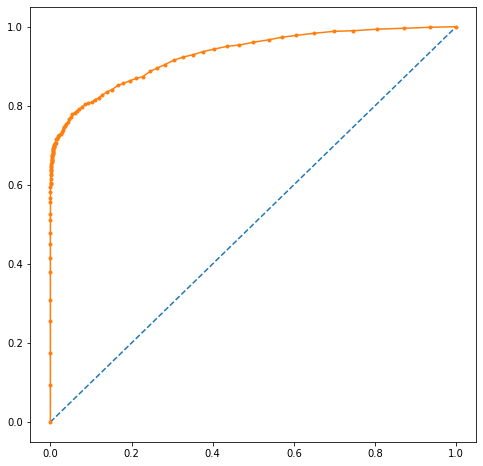

In [115]:
plt.figure(figsize=(8,8))
fpr, tpr, thresholds = roc_curve(y_mm_test, y_mm_probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Feature importance

In [90]:
feature_imp = pd.Series(clf.feature_importances_, index=np.array(X.columns)).sort_values(ascending=False)
feature_imp

loan_grade                        0.151365
loan_percent_income               0.110983
loan_int_rate                     0.099647
loan_percent_income_log           0.093052
person_home_ownership             0.066970
loan_amount_log                   0.061078
person_income_log                 0.057326
person_income                     0.053598
loan_amnt                         0.040201
person_emp_length_log             0.036659
person_emp_length                 0.036086
person_age_log                    0.032268
person_age                        0.031845
cb_person_cred_hist_length        0.024611
cb_person_cred_hist_length_log    0.024183
cb_person_default_on_file         0.014852
int_HOMEIMPROVEMENT               0.012787
int_DEBTCONSOLIDATION             0.012038
int_MEDICAL                       0.011990
int_VENTURE                       0.010659
int_EDUCATION                     0.009853
int_PERSONAL                      0.007946
dtype: float64

<AxesSubplot:>

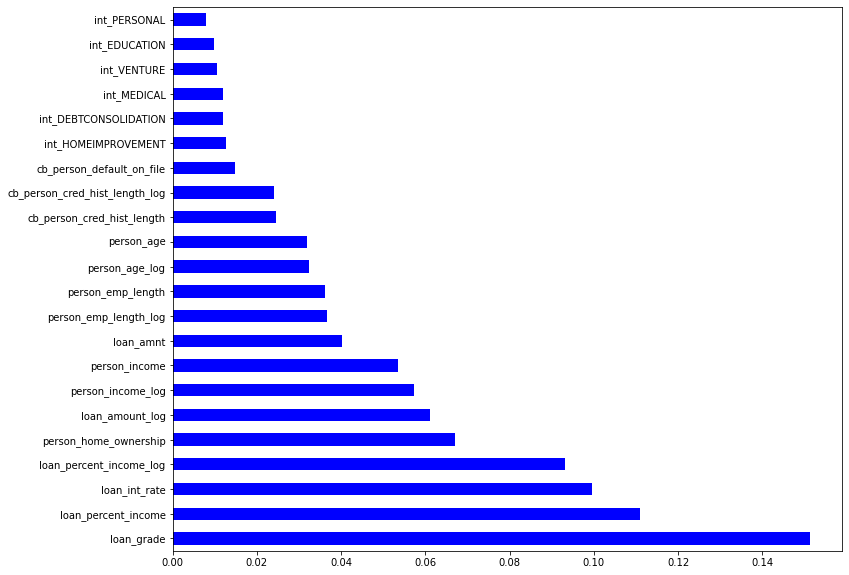

In [105]:
feature_imp.plot(kind='barh', figsize=(12,10), color= 'b')

## RandomForest Classifier with Robust scaler

In [99]:
clf2 = RandomForestClassifier(n_estimators=100)

In [100]:
clf2.fit(X_r_train, y_r_train)
y_r_pred = clf.predict(X_r_test)

In [101]:
print('Accuracy: ', metrics.accuracy_score(y_r_test, y_r_pred))
print('Training accuracy score: ', clf.score(X_r_train, y_r_train))
print('Testing accuracy score: ', clf.score(X_r_test, y_r_test))


Accuracy:  0.6705183758626224
Training accuracy score:  0.6663813396105286
Testing accuracy score:  0.6705183758626224


**Robust scaler is inefficient to apply the model.**

# Build pipeline for a model and turning parameter

In [169]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from time import time
# from atom import ATOMClassifier

In [143]:
t1=time()
t1

1656951574.8283231

In [155]:

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
             ('svc', LinearSVC(random_state=42)),
             ('lr', LogisticRegression(random_state=42)),
             ('dt', DecisionTreeClassifier(random_state=42)),
             ('kn', KNeighborsClassifier(n_neighbors=10)),
             ('gb', GaussianNB()),
             ('cat', CatBoostClassifier()),
             ('xgb', XGBClassifier())]
clf = StackingClassifier(estimators=estimators)
clf.fit(X_mm_train, y_mm_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.043777
0:	learn: 0.6524073	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6252578	total: 16.1ms	remaining: 8.05s
2:	learn: 0.5904100	total: 21ms	remaining: 6.96s
3:	learn: 0.5609556	total: 26.4ms	remaining: 6.58s
4:	learn: 0.5381171	total: 31.7ms	remaining: 6.31s
5:	learn: 0.5231803	total: 36.9ms	remaining: 6.12s
6:	learn: 0.5045989	total: 41.9ms	remaining: 5.95s
7:	learn: 0.4921163	total: 47.3ms	remaining: 5.87s
8:	learn: 0.4824033	total: 52.2ms	remaining: 5.75s
9:	learn: 0.4685586	total: 57ms	remaining: 5.65s
10:	learn: 0.4577488	total: 62.1ms	remaining: 5.58s
11:	learn: 0.4486180	total: 67.4ms	remaining: 5.55s
12:	learn: 0.4412755	total: 72.4ms	remaining: 5.49s
13:	learn: 0.4355856	total: 77.6ms	remaining: 5.46s
14:	learn: 0.4261242	total: 82.6ms	remaining: 5.42s
15:	learn: 0.4195553	total: 87.8ms	remaining: 5.4s
16:	learn: 0.4119797	total: 93.1ms	remaining: 5.38s
17:	learn: 0.4063654	total: 98.7ms	remaining: 5.38s
18:	learn: 0.4003806	total: 104ms	remaining: 5.36

167:	learn: 0.1885770	total: 891ms	remaining: 4.41s
168:	learn: 0.1881264	total: 897ms	remaining: 4.41s
169:	learn: 0.1877752	total: 903ms	remaining: 4.41s
170:	learn: 0.1870468	total: 908ms	remaining: 4.4s
171:	learn: 0.1864928	total: 913ms	remaining: 4.4s
172:	learn: 0.1862266	total: 919ms	remaining: 4.39s
173:	learn: 0.1859255	total: 924ms	remaining: 4.38s
174:	learn: 0.1858237	total: 929ms	remaining: 4.38s
175:	learn: 0.1854615	total: 934ms	remaining: 4.37s
176:	learn: 0.1850797	total: 939ms	remaining: 4.37s
177:	learn: 0.1845836	total: 944ms	remaining: 4.36s
178:	learn: 0.1842003	total: 949ms	remaining: 4.35s
179:	learn: 0.1840323	total: 954ms	remaining: 4.34s
180:	learn: 0.1837705	total: 959ms	remaining: 4.34s
181:	learn: 0.1826369	total: 964ms	remaining: 4.33s
182:	learn: 0.1822653	total: 969ms	remaining: 4.33s
183:	learn: 0.1818082	total: 974ms	remaining: 4.32s
184:	learn: 0.1814104	total: 979ms	remaining: 4.31s
185:	learn: 0.1809715	total: 984ms	remaining: 4.31s
186:	learn: 0.

328:	learn: 0.1478706	total: 1.73s	remaining: 3.53s
329:	learn: 0.1477959	total: 1.74s	remaining: 3.53s
330:	learn: 0.1477024	total: 1.74s	remaining: 3.52s
331:	learn: 0.1475309	total: 1.75s	remaining: 3.52s
332:	learn: 0.1474600	total: 1.75s	remaining: 3.52s
333:	learn: 0.1473017	total: 1.76s	remaining: 3.51s
334:	learn: 0.1472223	total: 1.76s	remaining: 3.5s
335:	learn: 0.1471311	total: 1.77s	remaining: 3.5s
336:	learn: 0.1468959	total: 1.78s	remaining: 3.5s
337:	learn: 0.1468080	total: 1.78s	remaining: 3.49s
338:	learn: 0.1467522	total: 1.79s	remaining: 3.49s
339:	learn: 0.1464979	total: 1.79s	remaining: 3.48s
340:	learn: 0.1464081	total: 1.8s	remaining: 3.48s
341:	learn: 0.1462157	total: 1.8s	remaining: 3.47s
342:	learn: 0.1459985	total: 1.81s	remaining: 3.46s
343:	learn: 0.1458946	total: 1.81s	remaining: 3.46s
344:	learn: 0.1456775	total: 1.82s	remaining: 3.45s
345:	learn: 0.1455747	total: 1.82s	remaining: 3.45s
346:	learn: 0.1453793	total: 1.83s	remaining: 3.44s
347:	learn: 0.145

520:	learn: 0.1274431	total: 2.79s	remaining: 2.57s
521:	learn: 0.1274158	total: 2.8s	remaining: 2.56s
522:	learn: 0.1273892	total: 2.81s	remaining: 2.56s
523:	learn: 0.1273393	total: 2.81s	remaining: 2.55s
524:	learn: 0.1272659	total: 2.82s	remaining: 2.55s
525:	learn: 0.1271803	total: 2.82s	remaining: 2.54s
526:	learn: 0.1270558	total: 2.83s	remaining: 2.54s
527:	learn: 0.1270060	total: 2.83s	remaining: 2.53s
528:	learn: 0.1269519	total: 2.84s	remaining: 2.53s
529:	learn: 0.1268831	total: 2.84s	remaining: 2.52s
530:	learn: 0.1268250	total: 2.85s	remaining: 2.52s
531:	learn: 0.1267764	total: 2.85s	remaining: 2.51s
532:	learn: 0.1266892	total: 2.86s	remaining: 2.51s
533:	learn: 0.1266371	total: 2.87s	remaining: 2.5s
534:	learn: 0.1264435	total: 2.87s	remaining: 2.5s
535:	learn: 0.1263963	total: 2.88s	remaining: 2.49s
536:	learn: 0.1263452	total: 2.88s	remaining: 2.48s
537:	learn: 0.1262769	total: 2.89s	remaining: 2.48s
538:	learn: 0.1261748	total: 2.89s	remaining: 2.47s
539:	learn: 0.1

688:	learn: 0.1168295	total: 3.68s	remaining: 1.66s
689:	learn: 0.1167492	total: 3.69s	remaining: 1.66s
690:	learn: 0.1166509	total: 3.69s	remaining: 1.65s
691:	learn: 0.1165392	total: 3.7s	remaining: 1.65s
692:	learn: 0.1164974	total: 3.71s	remaining: 1.64s
693:	learn: 0.1164262	total: 3.71s	remaining: 1.64s
694:	learn: 0.1163972	total: 3.72s	remaining: 1.63s
695:	learn: 0.1163593	total: 3.72s	remaining: 1.63s
696:	learn: 0.1162755	total: 3.73s	remaining: 1.62s
697:	learn: 0.1162355	total: 3.73s	remaining: 1.61s
698:	learn: 0.1161529	total: 3.74s	remaining: 1.61s
699:	learn: 0.1160752	total: 3.74s	remaining: 1.6s
700:	learn: 0.1159986	total: 3.75s	remaining: 1.6s
701:	learn: 0.1157991	total: 3.75s	remaining: 1.59s
702:	learn: 0.1157297	total: 3.76s	remaining: 1.59s
703:	learn: 0.1157119	total: 3.76s	remaining: 1.58s
704:	learn: 0.1156846	total: 3.77s	remaining: 1.57s
705:	learn: 0.1156108	total: 3.77s	remaining: 1.57s
706:	learn: 0.1155739	total: 3.78s	remaining: 1.56s
707:	learn: 0.1

861:	learn: 0.1074331	total: 4.57s	remaining: 732ms
862:	learn: 0.1073955	total: 4.58s	remaining: 727ms
863:	learn: 0.1073394	total: 4.59s	remaining: 722ms
864:	learn: 0.1073035	total: 4.59s	remaining: 717ms
865:	learn: 0.1072840	total: 4.6s	remaining: 711ms
866:	learn: 0.1072597	total: 4.6s	remaining: 706ms
867:	learn: 0.1071774	total: 4.61s	remaining: 701ms
868:	learn: 0.1070962	total: 4.61s	remaining: 695ms
869:	learn: 0.1070328	total: 4.62s	remaining: 690ms
870:	learn: 0.1069924	total: 4.62s	remaining: 685ms
871:	learn: 0.1069371	total: 4.63s	remaining: 679ms
872:	learn: 0.1068734	total: 4.63s	remaining: 674ms
873:	learn: 0.1068511	total: 4.64s	remaining: 669ms
874:	learn: 0.1067836	total: 4.64s	remaining: 663ms
875:	learn: 0.1067265	total: 4.65s	remaining: 658ms
876:	learn: 0.1066712	total: 4.65s	remaining: 653ms
877:	learn: 0.1066266	total: 4.66s	remaining: 647ms
878:	learn: 0.1065597	total: 4.66s	remaining: 642ms
879:	learn: 0.1065041	total: 4.67s	remaining: 637ms
880:	learn: 0.

c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program fi

Learning rate set to 0.039798
0:	learn: 0.6558350	total: 10.4ms	remaining: 10.3s
1:	learn: 0.6304458	total: 16.2ms	remaining: 8.06s
2:	learn: 0.5970380	total: 21.4ms	remaining: 7.1s
3:	learn: 0.5686269	total: 26ms	remaining: 6.46s
4:	learn: 0.5455948	total: 31.2ms	remaining: 6.21s
5:	learn: 0.5307036	total: 36.1ms	remaining: 5.99s
6:	learn: 0.5160264	total: 41.1ms	remaining: 5.82s
7:	learn: 0.5030610	total: 46ms	remaining: 5.7s
8:	learn: 0.4878883	total: 50.7ms	remaining: 5.58s
9:	learn: 0.4772463	total: 55.2ms	remaining: 5.46s
10:	learn: 0.4672592	total: 60.2ms	remaining: 5.41s
11:	learn: 0.4551167	total: 65.6ms	remaining: 5.4s
12:	learn: 0.4480049	total: 70.6ms	remaining: 5.36s
13:	learn: 0.4379945	total: 75.3ms	remaining: 5.3s
14:	learn: 0.4279581	total: 80.5ms	remaining: 5.28s
15:	learn: 0.4227225	total: 85.2ms	remaining: 5.24s
16:	learn: 0.4169585	total: 89.9ms	remaining: 5.2s
17:	learn: 0.4102488	total: 94.9ms	remaining: 5.17s
18:	learn: 0.4025402	total: 99.5ms	remaining: 5.14s
1

172:	learn: 0.1345900	total: 881ms	remaining: 4.21s
173:	learn: 0.1339496	total: 886ms	remaining: 4.21s
174:	learn: 0.1335692	total: 891ms	remaining: 4.2s
175:	learn: 0.1327421	total: 897ms	remaining: 4.2s
176:	learn: 0.1323518	total: 902ms	remaining: 4.19s
177:	learn: 0.1320364	total: 906ms	remaining: 4.18s
178:	learn: 0.1315590	total: 911ms	remaining: 4.18s
179:	learn: 0.1313492	total: 917ms	remaining: 4.17s
180:	learn: 0.1309128	total: 921ms	remaining: 4.17s
181:	learn: 0.1302786	total: 927ms	remaining: 4.17s
182:	learn: 0.1297648	total: 932ms	remaining: 4.16s
183:	learn: 0.1292486	total: 937ms	remaining: 4.15s
184:	learn: 0.1290003	total: 941ms	remaining: 4.15s
185:	learn: 0.1287494	total: 946ms	remaining: 4.14s
186:	learn: 0.1282907	total: 951ms	remaining: 4.13s
187:	learn: 0.1280964	total: 956ms	remaining: 4.13s
188:	learn: 0.1277116	total: 961ms	remaining: 4.12s
189:	learn: 0.1268852	total: 966ms	remaining: 4.12s
190:	learn: 0.1261115	total: 971ms	remaining: 4.11s
191:	learn: 0.

353:	learn: 0.0863045	total: 1.77s	remaining: 3.23s
354:	learn: 0.0862570	total: 1.77s	remaining: 3.22s
355:	learn: 0.0861727	total: 1.78s	remaining: 3.22s
356:	learn: 0.0861240	total: 1.78s	remaining: 3.21s
357:	learn: 0.0860434	total: 1.79s	remaining: 3.21s
358:	learn: 0.0858801	total: 1.79s	remaining: 3.21s
359:	learn: 0.0857706	total: 1.8s	remaining: 3.2s
360:	learn: 0.0855984	total: 1.8s	remaining: 3.19s
361:	learn: 0.0855073	total: 1.81s	remaining: 3.19s
362:	learn: 0.0853181	total: 1.81s	remaining: 3.19s
363:	learn: 0.0851969	total: 1.82s	remaining: 3.18s
364:	learn: 0.0848960	total: 1.82s	remaining: 3.17s
365:	learn: 0.0847288	total: 1.83s	remaining: 3.17s
366:	learn: 0.0845867	total: 1.84s	remaining: 3.17s
367:	learn: 0.0844280	total: 1.84s	remaining: 3.16s
368:	learn: 0.0841544	total: 1.85s	remaining: 3.16s
369:	learn: 0.0840375	total: 1.85s	remaining: 3.15s
370:	learn: 0.0838958	total: 1.86s	remaining: 3.15s
371:	learn: 0.0838504	total: 1.86s	remaining: 3.14s
372:	learn: 0.0

526:	learn: 0.0701546	total: 2.66s	remaining: 2.39s
527:	learn: 0.0700084	total: 2.67s	remaining: 2.38s
528:	learn: 0.0699821	total: 2.67s	remaining: 2.38s
529:	learn: 0.0699360	total: 2.67s	remaining: 2.37s
530:	learn: 0.0698500	total: 2.68s	remaining: 2.37s
531:	learn: 0.0698012	total: 2.69s	remaining: 2.36s
532:	learn: 0.0697732	total: 2.69s	remaining: 2.36s
533:	learn: 0.0696653	total: 2.69s	remaining: 2.35s
534:	learn: 0.0696332	total: 2.7s	remaining: 2.35s
535:	learn: 0.0695598	total: 2.7s	remaining: 2.34s
536:	learn: 0.0694650	total: 2.71s	remaining: 2.34s
537:	learn: 0.0693983	total: 2.71s	remaining: 2.33s
538:	learn: 0.0693605	total: 2.72s	remaining: 2.33s
539:	learn: 0.0693143	total: 2.72s	remaining: 2.32s
540:	learn: 0.0691966	total: 2.73s	remaining: 2.31s
541:	learn: 0.0690900	total: 2.73s	remaining: 2.31s
542:	learn: 0.0690319	total: 2.74s	remaining: 2.3s
543:	learn: 0.0689820	total: 2.74s	remaining: 2.3s
544:	learn: 0.0689396	total: 2.75s	remaining: 2.29s
545:	learn: 0.06

695:	learn: 0.0611740	total: 3.5s	remaining: 1.53s
696:	learn: 0.0611496	total: 3.51s	remaining: 1.53s
697:	learn: 0.0610758	total: 3.52s	remaining: 1.52s
698:	learn: 0.0610134	total: 3.52s	remaining: 1.52s
699:	learn: 0.0609181	total: 3.53s	remaining: 1.51s
700:	learn: 0.0609011	total: 3.53s	remaining: 1.51s
701:	learn: 0.0608760	total: 3.54s	remaining: 1.5s
702:	learn: 0.0608503	total: 3.54s	remaining: 1.5s
703:	learn: 0.0608017	total: 3.55s	remaining: 1.49s
704:	learn: 0.0607890	total: 3.55s	remaining: 1.49s
705:	learn: 0.0607478	total: 3.56s	remaining: 1.48s
706:	learn: 0.0607141	total: 3.56s	remaining: 1.48s
707:	learn: 0.0606474	total: 3.57s	remaining: 1.47s
708:	learn: 0.0605706	total: 3.58s	remaining: 1.47s
709:	learn: 0.0605281	total: 3.58s	remaining: 1.46s
710:	learn: 0.0604520	total: 3.58s	remaining: 1.46s
711:	learn: 0.0603994	total: 3.59s	remaining: 1.45s
712:	learn: 0.0603898	total: 3.6s	remaining: 1.45s
713:	learn: 0.0603555	total: 3.6s	remaining: 1.44s
714:	learn: 0.060

866:	learn: 0.0547791	total: 4.39s	remaining: 673ms
867:	learn: 0.0547291	total: 4.39s	remaining: 668ms
868:	learn: 0.0546685	total: 4.4s	remaining: 663ms
869:	learn: 0.0546007	total: 4.4s	remaining: 658ms
870:	learn: 0.0545585	total: 4.41s	remaining: 653ms
871:	learn: 0.0545356	total: 4.42s	remaining: 648ms
872:	learn: 0.0545080	total: 4.42s	remaining: 643ms
873:	learn: 0.0544814	total: 4.43s	remaining: 638ms
874:	learn: 0.0544761	total: 4.43s	remaining: 633ms
875:	learn: 0.0544568	total: 4.44s	remaining: 628ms
876:	learn: 0.0544105	total: 4.44s	remaining: 623ms
877:	learn: 0.0543255	total: 4.45s	remaining: 618ms
878:	learn: 0.0542793	total: 4.45s	remaining: 613ms
879:	learn: 0.0542552	total: 4.46s	remaining: 608ms
880:	learn: 0.0542342	total: 4.46s	remaining: 603ms
881:	learn: 0.0542039	total: 4.47s	remaining: 598ms
882:	learn: 0.0541334	total: 4.47s	remaining: 593ms
883:	learn: 0.0540701	total: 4.48s	remaining: 588ms
884:	learn: 0.0540086	total: 4.48s	remaining: 583ms
885:	learn: 0.

33:	learn: 0.3511425	total: 172ms	remaining: 4.87s
34:	learn: 0.3488088	total: 177ms	remaining: 4.87s
35:	learn: 0.3468017	total: 182ms	remaining: 4.88s
36:	learn: 0.3451719	total: 187ms	remaining: 4.87s
37:	learn: 0.3430117	total: 192ms	remaining: 4.86s
38:	learn: 0.3406519	total: 198ms	remaining: 4.87s
39:	learn: 0.3391189	total: 203ms	remaining: 4.87s
40:	learn: 0.3377144	total: 208ms	remaining: 4.86s
41:	learn: 0.3360505	total: 213ms	remaining: 4.87s
42:	learn: 0.3342427	total: 218ms	remaining: 4.86s
43:	learn: 0.3318712	total: 223ms	remaining: 4.84s
44:	learn: 0.3294208	total: 227ms	remaining: 4.82s
45:	learn: 0.3264706	total: 232ms	remaining: 4.82s
46:	learn: 0.3226309	total: 237ms	remaining: 4.81s
47:	learn: 0.3202943	total: 242ms	remaining: 4.8s
48:	learn: 0.3193429	total: 247ms	remaining: 4.79s
49:	learn: 0.3175030	total: 252ms	remaining: 4.78s
50:	learn: 0.3157899	total: 256ms	remaining: 4.77s
51:	learn: 0.3134258	total: 261ms	remaining: 4.76s
52:	learn: 0.3107373	total: 266m

210:	learn: 0.1781506	total: 1.04s	remaining: 3.9s
211:	learn: 0.1778554	total: 1.05s	remaining: 3.9s
212:	learn: 0.1774038	total: 1.05s	remaining: 3.9s
213:	learn: 0.1772399	total: 1.06s	remaining: 3.89s
214:	learn: 0.1769779	total: 1.06s	remaining: 3.89s
215:	learn: 0.1768167	total: 1.07s	remaining: 3.88s
216:	learn: 0.1764392	total: 1.07s	remaining: 3.88s
217:	learn: 0.1762600	total: 1.08s	remaining: 3.87s
218:	learn: 0.1760947	total: 1.08s	remaining: 3.86s
219:	learn: 0.1757908	total: 1.09s	remaining: 3.86s
220:	learn: 0.1755023	total: 1.09s	remaining: 3.85s
221:	learn: 0.1753287	total: 1.1s	remaining: 3.85s
222:	learn: 0.1750510	total: 1.1s	remaining: 3.84s
223:	learn: 0.1748560	total: 1.11s	remaining: 3.83s
224:	learn: 0.1745623	total: 1.11s	remaining: 3.83s
225:	learn: 0.1743400	total: 1.12s	remaining: 3.82s
226:	learn: 0.1741115	total: 1.12s	remaining: 3.82s
227:	learn: 0.1738983	total: 1.13s	remaining: 3.81s
228:	learn: 0.1737673	total: 1.13s	remaining: 3.81s
229:	learn: 0.173

391:	learn: 0.1399585	total: 1.93s	remaining: 3s
392:	learn: 0.1397555	total: 1.94s	remaining: 3s
393:	learn: 0.1396695	total: 1.94s	remaining: 2.99s
394:	learn: 0.1394364	total: 1.95s	remaining: 2.99s
395:	learn: 0.1392857	total: 1.96s	remaining: 2.98s
396:	learn: 0.1392027	total: 1.96s	remaining: 2.98s
397:	learn: 0.1390969	total: 1.97s	remaining: 2.98s
398:	learn: 0.1390293	total: 1.97s	remaining: 2.97s
399:	learn: 0.1389844	total: 1.98s	remaining: 2.96s
400:	learn: 0.1388811	total: 1.98s	remaining: 2.96s
401:	learn: 0.1387354	total: 1.99s	remaining: 2.96s
402:	learn: 0.1386662	total: 1.99s	remaining: 2.95s
403:	learn: 0.1385307	total: 2s	remaining: 2.95s
404:	learn: 0.1384540	total: 2s	remaining: 2.94s
405:	learn: 0.1382427	total: 2.01s	remaining: 2.94s
406:	learn: 0.1381645	total: 2.01s	remaining: 2.93s
407:	learn: 0.1380666	total: 2.02s	remaining: 2.93s
408:	learn: 0.1379605	total: 2.02s	remaining: 2.93s
409:	learn: 0.1378462	total: 2.03s	remaining: 2.92s
410:	learn: 0.1376792	to

564:	learn: 0.1224446	total: 2.81s	remaining: 2.17s
565:	learn: 0.1223538	total: 2.82s	remaining: 2.16s
566:	learn: 0.1222659	total: 2.82s	remaining: 2.16s
567:	learn: 0.1221900	total: 2.83s	remaining: 2.15s
568:	learn: 0.1221246	total: 2.83s	remaining: 2.15s
569:	learn: 0.1220751	total: 2.84s	remaining: 2.14s
570:	learn: 0.1220297	total: 2.84s	remaining: 2.14s
571:	learn: 0.1219990	total: 2.85s	remaining: 2.13s
572:	learn: 0.1219584	total: 2.85s	remaining: 2.13s
573:	learn: 0.1219108	total: 2.86s	remaining: 2.12s
574:	learn: 0.1218207	total: 2.86s	remaining: 2.12s
575:	learn: 0.1217911	total: 2.87s	remaining: 2.11s
576:	learn: 0.1217642	total: 2.87s	remaining: 2.1s
577:	learn: 0.1216708	total: 2.88s	remaining: 2.1s
578:	learn: 0.1215982	total: 2.88s	remaining: 2.09s
579:	learn: 0.1214687	total: 2.88s	remaining: 2.09s
580:	learn: 0.1213821	total: 2.89s	remaining: 2.08s
581:	learn: 0.1212737	total: 2.9s	remaining: 2.08s
582:	learn: 0.1212304	total: 2.9s	remaining: 2.07s
583:	learn: 0.12

736:	learn: 0.1106401	total: 3.66s	remaining: 1.31s
737:	learn: 0.1105903	total: 3.67s	remaining: 1.3s
738:	learn: 0.1105093	total: 3.67s	remaining: 1.3s
739:	learn: 0.1104129	total: 3.68s	remaining: 1.29s
740:	learn: 0.1103617	total: 3.68s	remaining: 1.29s
741:	learn: 0.1102744	total: 3.69s	remaining: 1.28s
742:	learn: 0.1101374	total: 3.69s	remaining: 1.28s
743:	learn: 0.1100621	total: 3.7s	remaining: 1.27s
744:	learn: 0.1100277	total: 3.7s	remaining: 1.27s
745:	learn: 0.1099188	total: 3.71s	remaining: 1.26s
746:	learn: 0.1098740	total: 3.71s	remaining: 1.26s
747:	learn: 0.1098061	total: 3.72s	remaining: 1.25s
748:	learn: 0.1097336	total: 3.72s	remaining: 1.25s
749:	learn: 0.1096234	total: 3.73s	remaining: 1.24s
750:	learn: 0.1095429	total: 3.73s	remaining: 1.24s
751:	learn: 0.1095335	total: 3.74s	remaining: 1.23s
752:	learn: 0.1094931	total: 3.74s	remaining: 1.23s
753:	learn: 0.1094656	total: 3.75s	remaining: 1.22s
754:	learn: 0.1094242	total: 3.75s	remaining: 1.22s
755:	learn: 0.10

917:	learn: 0.1012307	total: 4.55s	remaining: 406ms
918:	learn: 0.1011723	total: 4.55s	remaining: 401ms
919:	learn: 0.1011074	total: 4.56s	remaining: 396ms
920:	learn: 0.1010713	total: 4.56s	remaining: 391ms
921:	learn: 0.1010347	total: 4.57s	remaining: 386ms
922:	learn: 0.1009919	total: 4.57s	remaining: 382ms
923:	learn: 0.1009276	total: 4.58s	remaining: 377ms
924:	learn: 0.1009014	total: 4.58s	remaining: 372ms
925:	learn: 0.1008242	total: 4.59s	remaining: 367ms
926:	learn: 0.1007413	total: 4.59s	remaining: 362ms
927:	learn: 0.1007046	total: 4.6s	remaining: 357ms
928:	learn: 0.1006593	total: 4.6s	remaining: 352ms
929:	learn: 0.1006309	total: 4.61s	remaining: 347ms
930:	learn: 0.1005608	total: 4.61s	remaining: 342ms
931:	learn: 0.1005143	total: 4.62s	remaining: 337ms
932:	learn: 0.1004342	total: 4.62s	remaining: 332ms
933:	learn: 0.1003755	total: 4.63s	remaining: 327ms
934:	learn: 0.1003467	total: 4.63s	remaining: 322ms
935:	learn: 0.1003288	total: 4.64s	remaining: 317ms
936:	learn: 0.

109:	learn: 0.2510378	total: 526ms	remaining: 4.25s
110:	learn: 0.2500163	total: 531ms	remaining: 4.25s
111:	learn: 0.2486761	total: 536ms	remaining: 4.25s
112:	learn: 0.2476238	total: 541ms	remaining: 4.25s
113:	learn: 0.2469983	total: 546ms	remaining: 4.25s
114:	learn: 0.2462809	total: 551ms	remaining: 4.24s
115:	learn: 0.2453727	total: 556ms	remaining: 4.24s
116:	learn: 0.2443827	total: 562ms	remaining: 4.24s
117:	learn: 0.2437096	total: 566ms	remaining: 4.23s
118:	learn: 0.2418229	total: 571ms	remaining: 4.23s
119:	learn: 0.2412001	total: 576ms	remaining: 4.22s
120:	learn: 0.2408843	total: 581ms	remaining: 4.22s
121:	learn: 0.2405314	total: 586ms	remaining: 4.21s
122:	learn: 0.2400954	total: 590ms	remaining: 4.21s
123:	learn: 0.2393992	total: 595ms	remaining: 4.21s
124:	learn: 0.2386661	total: 600ms	remaining: 4.2s
125:	learn: 0.2381435	total: 605ms	remaining: 4.2s
126:	learn: 0.2375510	total: 610ms	remaining: 4.19s
127:	learn: 0.2364326	total: 614ms	remaining: 4.19s
128:	learn: 0.

286:	learn: 0.1815724	total: 1.38s	remaining: 3.42s
287:	learn: 0.1814471	total: 1.38s	remaining: 3.42s
288:	learn: 0.1813489	total: 1.39s	remaining: 3.41s
289:	learn: 0.1812346	total: 1.39s	remaining: 3.41s
290:	learn: 0.1811131	total: 1.4s	remaining: 3.4s
291:	learn: 0.1809715	total: 1.4s	remaining: 3.4s
292:	learn: 0.1808448	total: 1.41s	remaining: 3.39s
293:	learn: 0.1807324	total: 1.41s	remaining: 3.39s
294:	learn: 0.1805714	total: 1.42s	remaining: 3.38s
295:	learn: 0.1801475	total: 1.42s	remaining: 3.38s
296:	learn: 0.1798659	total: 1.42s	remaining: 3.37s
297:	learn: 0.1796361	total: 1.43s	remaining: 3.37s
298:	learn: 0.1795927	total: 1.43s	remaining: 3.36s
299:	learn: 0.1793915	total: 1.44s	remaining: 3.36s
300:	learn: 0.1791339	total: 1.44s	remaining: 3.35s
301:	learn: 0.1790014	total: 1.45s	remaining: 3.35s
302:	learn: 0.1788743	total: 1.45s	remaining: 3.34s
303:	learn: 0.1786232	total: 1.46s	remaining: 3.34s
304:	learn: 0.1783323	total: 1.46s	remaining: 3.33s
305:	learn: 0.17

474:	learn: 0.1542899	total: 2.27s	remaining: 2.51s
475:	learn: 0.1541655	total: 2.27s	remaining: 2.5s
476:	learn: 0.1540352	total: 2.28s	remaining: 2.5s
477:	learn: 0.1539575	total: 2.28s	remaining: 2.49s
478:	learn: 0.1538890	total: 2.29s	remaining: 2.49s
479:	learn: 0.1536999	total: 2.29s	remaining: 2.48s
480:	learn: 0.1535982	total: 2.3s	remaining: 2.48s
481:	learn: 0.1535444	total: 2.3s	remaining: 2.47s
482:	learn: 0.1534686	total: 2.31s	remaining: 2.47s
483:	learn: 0.1533723	total: 2.31s	remaining: 2.46s
484:	learn: 0.1533167	total: 2.32s	remaining: 2.46s
485:	learn: 0.1531099	total: 2.32s	remaining: 2.46s
486:	learn: 0.1530296	total: 2.33s	remaining: 2.45s
487:	learn: 0.1528902	total: 2.33s	remaining: 2.44s
488:	learn: 0.1528158	total: 2.33s	remaining: 2.44s
489:	learn: 0.1527628	total: 2.34s	remaining: 2.44s
490:	learn: 0.1526417	total: 2.34s	remaining: 2.43s
491:	learn: 0.1525361	total: 2.35s	remaining: 2.42s
492:	learn: 0.1524662	total: 2.35s	remaining: 2.42s
493:	learn: 0.15

656:	learn: 0.1384627	total: 3.15s	remaining: 1.65s
657:	learn: 0.1383542	total: 3.16s	remaining: 1.64s
658:	learn: 0.1383100	total: 3.16s	remaining: 1.64s
659:	learn: 0.1382511	total: 3.17s	remaining: 1.63s
660:	learn: 0.1381815	total: 3.17s	remaining: 1.63s
661:	learn: 0.1381238	total: 3.18s	remaining: 1.62s
662:	learn: 0.1380767	total: 3.18s	remaining: 1.62s
663:	learn: 0.1380102	total: 3.19s	remaining: 1.61s
664:	learn: 0.1379192	total: 3.19s	remaining: 1.61s
665:	learn: 0.1378164	total: 3.2s	remaining: 1.6s
666:	learn: 0.1377338	total: 3.2s	remaining: 1.6s
667:	learn: 0.1376440	total: 3.21s	remaining: 1.59s
668:	learn: 0.1375698	total: 3.21s	remaining: 1.59s
669:	learn: 0.1375017	total: 3.21s	remaining: 1.58s
670:	learn: 0.1374376	total: 3.22s	remaining: 1.58s
671:	learn: 0.1374014	total: 3.23s	remaining: 1.57s
672:	learn: 0.1373386	total: 3.23s	remaining: 1.57s
673:	learn: 0.1372947	total: 3.23s	remaining: 1.56s
674:	learn: 0.1372129	total: 3.24s	remaining: 1.56s
675:	learn: 0.13

831:	learn: 0.1273002	total: 4.02s	remaining: 811ms
832:	learn: 0.1272325	total: 4.02s	remaining: 806ms
833:	learn: 0.1271888	total: 4.03s	remaining: 802ms
834:	learn: 0.1271767	total: 4.03s	remaining: 797ms
835:	learn: 0.1270846	total: 4.04s	remaining: 792ms
836:	learn: 0.1270384	total: 4.04s	remaining: 787ms
837:	learn: 0.1269713	total: 4.05s	remaining: 783ms
838:	learn: 0.1269053	total: 4.05s	remaining: 778ms
839:	learn: 0.1268662	total: 4.06s	remaining: 773ms
840:	learn: 0.1268306	total: 4.06s	remaining: 768ms
841:	learn: 0.1267675	total: 4.07s	remaining: 763ms
842:	learn: 0.1266897	total: 4.07s	remaining: 759ms
843:	learn: 0.1266198	total: 4.08s	remaining: 754ms
844:	learn: 0.1265500	total: 4.08s	remaining: 749ms
845:	learn: 0.1264869	total: 4.09s	remaining: 744ms
846:	learn: 0.1264217	total: 4.09s	remaining: 739ms
847:	learn: 0.1263468	total: 4.1s	remaining: 734ms
848:	learn: 0.1263033	total: 4.1s	remaining: 730ms
849:	learn: 0.1262645	total: 4.11s	remaining: 725ms
850:	learn: 0.

Learning rate set to 0.039799
0:	learn: 0.6567389	total: 4.5ms	remaining: 4.49s
1:	learn: 0.6312658	total: 8.96ms	remaining: 4.47s
2:	learn: 0.5990599	total: 13.7ms	remaining: 4.55s
3:	learn: 0.5714771	total: 18.5ms	remaining: 4.6s
4:	learn: 0.5484628	total: 23.4ms	remaining: 4.65s
5:	learn: 0.5331435	total: 28.1ms	remaining: 4.66s
6:	learn: 0.5184088	total: 32.9ms	remaining: 4.66s
7:	learn: 0.5066922	total: 37.3ms	remaining: 4.63s
8:	learn: 0.4931867	total: 41.7ms	remaining: 4.59s
9:	learn: 0.4789205	total: 46.4ms	remaining: 4.59s
10:	learn: 0.4699090	total: 50.8ms	remaining: 4.57s
11:	learn: 0.4620856	total: 55.4ms	remaining: 4.56s
12:	learn: 0.4516499	total: 60.2ms	remaining: 4.57s
13:	learn: 0.4433083	total: 65.2ms	remaining: 4.59s
14:	learn: 0.4361498	total: 69.9ms	remaining: 4.59s
15:	learn: 0.4308003	total: 74.6ms	remaining: 4.59s
16:	learn: 0.4219914	total: 79.1ms	remaining: 4.57s
17:	learn: 0.4155468	total: 83.8ms	remaining: 4.57s
18:	learn: 0.4097005	total: 88.8ms	remaining: 

181:	learn: 0.2119735	total: 881ms	remaining: 3.96s
182:	learn: 0.2113633	total: 886ms	remaining: 3.96s
183:	learn: 0.2104522	total: 891ms	remaining: 3.95s
184:	learn: 0.2100392	total: 896ms	remaining: 3.95s
185:	learn: 0.2091492	total: 901ms	remaining: 3.94s
186:	learn: 0.2084743	total: 906ms	remaining: 3.94s
187:	learn: 0.2081693	total: 911ms	remaining: 3.93s
188:	learn: 0.2077959	total: 915ms	remaining: 3.93s
189:	learn: 0.2073740	total: 920ms	remaining: 3.92s
190:	learn: 0.2072122	total: 925ms	remaining: 3.92s
191:	learn: 0.2064346	total: 930ms	remaining: 3.91s
192:	learn: 0.2060298	total: 934ms	remaining: 3.91s
193:	learn: 0.2056214	total: 939ms	remaining: 3.9s
194:	learn: 0.2051464	total: 944ms	remaining: 3.9s
195:	learn: 0.2046432	total: 948ms	remaining: 3.89s
196:	learn: 0.2039206	total: 953ms	remaining: 3.88s
197:	learn: 0.2034575	total: 957ms	remaining: 3.88s
198:	learn: 0.2032451	total: 962ms	remaining: 3.87s
199:	learn: 0.2030043	total: 967ms	remaining: 3.87s
200:	learn: 0.

370:	learn: 0.1660401	total: 1.77s	remaining: 3.01s
371:	learn: 0.1659363	total: 1.78s	remaining: 3s
372:	learn: 0.1657986	total: 1.78s	remaining: 3s
373:	learn: 0.1656975	total: 1.79s	remaining: 3s
374:	learn: 0.1656676	total: 1.79s	remaining: 2.99s
375:	learn: 0.1655469	total: 1.8s	remaining: 2.98s
376:	learn: 0.1652723	total: 1.8s	remaining: 2.98s
377:	learn: 0.1651466	total: 1.81s	remaining: 2.98s
378:	learn: 0.1650661	total: 1.81s	remaining: 2.97s
379:	learn: 0.1646772	total: 1.82s	remaining: 2.96s
380:	learn: 0.1645917	total: 1.82s	remaining: 2.96s
381:	learn: 0.1643955	total: 1.83s	remaining: 2.96s
382:	learn: 0.1641674	total: 1.83s	remaining: 2.95s
383:	learn: 0.1641131	total: 1.84s	remaining: 2.94s
384:	learn: 0.1640525	total: 1.84s	remaining: 2.94s
385:	learn: 0.1636625	total: 1.84s	remaining: 2.94s
386:	learn: 0.1635850	total: 1.85s	remaining: 2.93s
387:	learn: 0.1634774	total: 1.85s	remaining: 2.92s
388:	learn: 0.1633767	total: 1.86s	remaining: 2.92s
389:	learn: 0.1632583	t

556:	learn: 0.1445314	total: 2.66s	remaining: 2.11s
557:	learn: 0.1444912	total: 2.66s	remaining: 2.11s
558:	learn: 0.1444265	total: 2.67s	remaining: 2.1s
559:	learn: 0.1443547	total: 2.67s	remaining: 2.1s
560:	learn: 0.1442930	total: 2.68s	remaining: 2.09s
561:	learn: 0.1442278	total: 2.68s	remaining: 2.09s
562:	learn: 0.1441293	total: 2.69s	remaining: 2.08s
563:	learn: 0.1440806	total: 2.69s	remaining: 2.08s
564:	learn: 0.1439490	total: 2.69s	remaining: 2.08s
565:	learn: 0.1439029	total: 2.7s	remaining: 2.07s
566:	learn: 0.1438591	total: 2.7s	remaining: 2.06s
567:	learn: 0.1437686	total: 2.71s	remaining: 2.06s
568:	learn: 0.1436855	total: 2.71s	remaining: 2.06s
569:	learn: 0.1436139	total: 2.72s	remaining: 2.05s
570:	learn: 0.1435197	total: 2.72s	remaining: 2.05s
571:	learn: 0.1433911	total: 2.73s	remaining: 2.04s
572:	learn: 0.1432917	total: 2.73s	remaining: 2.04s
573:	learn: 0.1432320	total: 2.74s	remaining: 2.03s
574:	learn: 0.1432212	total: 2.74s	remaining: 2.03s
575:	learn: 0.14

733:	learn: 0.1316035	total: 3.52s	remaining: 1.28s
734:	learn: 0.1315403	total: 3.53s	remaining: 1.27s
735:	learn: 0.1314302	total: 3.53s	remaining: 1.27s
736:	learn: 0.1312056	total: 3.54s	remaining: 1.26s
737:	learn: 0.1311503	total: 3.54s	remaining: 1.26s
738:	learn: 0.1310943	total: 3.55s	remaining: 1.25s
739:	learn: 0.1310248	total: 3.56s	remaining: 1.25s
740:	learn: 0.1309499	total: 3.56s	remaining: 1.24s
741:	learn: 0.1308392	total: 3.57s	remaining: 1.24s
742:	learn: 0.1307716	total: 3.57s	remaining: 1.24s
743:	learn: 0.1305391	total: 3.58s	remaining: 1.23s
744:	learn: 0.1304772	total: 3.58s	remaining: 1.23s
745:	learn: 0.1304183	total: 3.59s	remaining: 1.22s
746:	learn: 0.1303492	total: 3.59s	remaining: 1.22s
747:	learn: 0.1303176	total: 3.6s	remaining: 1.21s
748:	learn: 0.1302196	total: 3.6s	remaining: 1.21s
749:	learn: 0.1301663	total: 3.61s	remaining: 1.2s
750:	learn: 0.1301358	total: 3.61s	remaining: 1.2s
751:	learn: 0.1301010	total: 3.62s	remaining: 1.19s
752:	learn: 0.13

909:	learn: 0.1210590	total: 4.41s	remaining: 436ms
910:	learn: 0.1209883	total: 4.41s	remaining: 431ms
911:	learn: 0.1209195	total: 4.42s	remaining: 426ms
912:	learn: 0.1208467	total: 4.42s	remaining: 421ms
913:	learn: 0.1208069	total: 4.43s	remaining: 417ms
914:	learn: 0.1207327	total: 4.43s	remaining: 412ms
915:	learn: 0.1207259	total: 4.44s	remaining: 407ms
916:	learn: 0.1207096	total: 4.44s	remaining: 402ms
917:	learn: 0.1206473	total: 4.45s	remaining: 397ms
918:	learn: 0.1206005	total: 4.45s	remaining: 392ms
919:	learn: 0.1205384	total: 4.46s	remaining: 388ms
920:	learn: 0.1204951	total: 4.46s	remaining: 383ms
921:	learn: 0.1204042	total: 4.47s	remaining: 378ms
922:	learn: 0.1203655	total: 4.47s	remaining: 373ms
923:	learn: 0.1203215	total: 4.48s	remaining: 368ms
924:	learn: 0.1202827	total: 4.48s	remaining: 363ms
925:	learn: 0.1202051	total: 4.49s	remaining: 359ms
926:	learn: 0.1201534	total: 4.49s	remaining: 354ms
927:	learn: 0.1200918	total: 4.5s	remaining: 349ms
928:	learn: 0

71:	learn: 0.2936920	total: 355ms	remaining: 4.58s
72:	learn: 0.2928939	total: 361ms	remaining: 4.58s
73:	learn: 0.2908611	total: 366ms	remaining: 4.58s
74:	learn: 0.2902083	total: 371ms	remaining: 4.58s
75:	learn: 0.2885465	total: 376ms	remaining: 4.58s
76:	learn: 0.2871564	total: 381ms	remaining: 4.57s
77:	learn: 0.2856959	total: 386ms	remaining: 4.56s
78:	learn: 0.2834184	total: 391ms	remaining: 4.56s
79:	learn: 0.2815798	total: 396ms	remaining: 4.55s
80:	learn: 0.2805842	total: 401ms	remaining: 4.54s
81:	learn: 0.2791950	total: 405ms	remaining: 4.54s
82:	learn: 0.2784283	total: 410ms	remaining: 4.53s
83:	learn: 0.2776332	total: 415ms	remaining: 4.52s
84:	learn: 0.2769135	total: 420ms	remaining: 4.52s
85:	learn: 0.2762703	total: 424ms	remaining: 4.51s
86:	learn: 0.2753321	total: 429ms	remaining: 4.5s
87:	learn: 0.2749668	total: 434ms	remaining: 4.49s
88:	learn: 0.2732688	total: 439ms	remaining: 4.49s
89:	learn: 0.2724190	total: 443ms	remaining: 4.48s
90:	learn: 0.2714449	total: 448m

255:	learn: 0.1878512	total: 1.25s	remaining: 3.62s
256:	learn: 0.1874312	total: 1.25s	remaining: 3.62s
257:	learn: 0.1872411	total: 1.25s	remaining: 3.61s
258:	learn: 0.1869273	total: 1.26s	remaining: 3.61s
259:	learn: 0.1868296	total: 1.27s	remaining: 3.6s
260:	learn: 0.1866227	total: 1.27s	remaining: 3.6s
261:	learn: 0.1863975	total: 1.28s	remaining: 3.6s
262:	learn: 0.1861794	total: 1.28s	remaining: 3.59s
263:	learn: 0.1858406	total: 1.29s	remaining: 3.58s
264:	learn: 0.1855806	total: 1.29s	remaining: 3.58s
265:	learn: 0.1850825	total: 1.3s	remaining: 3.58s
266:	learn: 0.1848309	total: 1.3s	remaining: 3.57s
267:	learn: 0.1846621	total: 1.31s	remaining: 3.57s
268:	learn: 0.1845065	total: 1.31s	remaining: 3.56s
269:	learn: 0.1843760	total: 1.32s	remaining: 3.56s
270:	learn: 0.1840302	total: 1.32s	remaining: 3.56s
271:	learn: 0.1838408	total: 1.33s	remaining: 3.55s
272:	learn: 0.1837432	total: 1.33s	remaining: 3.55s
273:	learn: 0.1835984	total: 1.34s	remaining: 3.55s
274:	learn: 0.183

430:	learn: 0.1585802	total: 2.13s	remaining: 2.81s
431:	learn: 0.1584856	total: 2.13s	remaining: 2.81s
432:	learn: 0.1583612	total: 2.14s	remaining: 2.8s
433:	learn: 0.1583007	total: 2.15s	remaining: 2.8s
434:	learn: 0.1582403	total: 2.15s	remaining: 2.79s
435:	learn: 0.1580496	total: 2.16s	remaining: 2.79s
436:	learn: 0.1578924	total: 2.16s	remaining: 2.78s
437:	learn: 0.1577455	total: 2.17s	remaining: 2.78s
438:	learn: 0.1575573	total: 2.17s	remaining: 2.77s
439:	learn: 0.1574877	total: 2.18s	remaining: 2.77s
440:	learn: 0.1573564	total: 2.18s	remaining: 2.76s
441:	learn: 0.1570033	total: 2.19s	remaining: 2.76s
442:	learn: 0.1569031	total: 2.19s	remaining: 2.75s
443:	learn: 0.1568028	total: 2.19s	remaining: 2.75s
444:	learn: 0.1567249	total: 2.2s	remaining: 2.75s
445:	learn: 0.1566761	total: 2.21s	remaining: 2.74s
446:	learn: 0.1565987	total: 2.21s	remaining: 2.73s
447:	learn: 0.1565200	total: 2.21s	remaining: 2.73s
448:	learn: 0.1563947	total: 2.22s	remaining: 2.73s
449:	learn: 0.1

611:	learn: 0.1409688	total: 3.02s	remaining: 1.91s
612:	learn: 0.1408852	total: 3.02s	remaining: 1.91s
613:	learn: 0.1408152	total: 3.02s	remaining: 1.9s
614:	learn: 0.1407750	total: 3.03s	remaining: 1.9s
615:	learn: 0.1406590	total: 3.04s	remaining: 1.89s
616:	learn: 0.1405767	total: 3.04s	remaining: 1.89s
617:	learn: 0.1405300	total: 3.04s	remaining: 1.88s
618:	learn: 0.1404796	total: 3.05s	remaining: 1.88s
619:	learn: 0.1404049	total: 3.05s	remaining: 1.87s
620:	learn: 0.1403159	total: 3.06s	remaining: 1.87s
621:	learn: 0.1402605	total: 3.06s	remaining: 1.86s
622:	learn: 0.1402052	total: 3.07s	remaining: 1.86s
623:	learn: 0.1401352	total: 3.07s	remaining: 1.85s
624:	learn: 0.1400311	total: 3.08s	remaining: 1.85s
625:	learn: 0.1399554	total: 3.08s	remaining: 1.84s
626:	learn: 0.1397998	total: 3.09s	remaining: 1.84s
627:	learn: 0.1396758	total: 3.09s	remaining: 1.83s
628:	learn: 0.1396162	total: 3.1s	remaining: 1.83s
629:	learn: 0.1395584	total: 3.1s	remaining: 1.82s
630:	learn: 0.13

794:	learn: 0.1284786	total: 3.89s	remaining: 1s
795:	learn: 0.1284034	total: 3.89s	remaining: 998ms
796:	learn: 0.1283159	total: 3.9s	remaining: 993ms
797:	learn: 0.1282728	total: 3.9s	remaining: 988ms
798:	learn: 0.1282110	total: 3.91s	remaining: 983ms
799:	learn: 0.1281832	total: 3.91s	remaining: 978ms
800:	learn: 0.1281592	total: 3.92s	remaining: 974ms
801:	learn: 0.1281231	total: 3.92s	remaining: 969ms
802:	learn: 0.1280683	total: 3.93s	remaining: 964ms
803:	learn: 0.1280201	total: 3.93s	remaining: 959ms
804:	learn: 0.1279234	total: 3.94s	remaining: 954ms
805:	learn: 0.1278765	total: 3.94s	remaining: 949ms
806:	learn: 0.1278040	total: 3.95s	remaining: 944ms
807:	learn: 0.1277496	total: 3.95s	remaining: 939ms
808:	learn: 0.1277092	total: 3.96s	remaining: 934ms
809:	learn: 0.1276633	total: 3.96s	remaining: 929ms
810:	learn: 0.1276259	total: 3.97s	remaining: 924ms
811:	learn: 0.1275707	total: 3.97s	remaining: 919ms
812:	learn: 0.1275349	total: 3.98s	remaining: 915ms
813:	learn: 0.127

975:	learn: 0.1188293	total: 4.75s	remaining: 117ms
976:	learn: 0.1187783	total: 4.76s	remaining: 112ms
977:	learn: 0.1186964	total: 4.77s	remaining: 107ms
978:	learn: 0.1186377	total: 4.77s	remaining: 102ms
979:	learn: 0.1186275	total: 4.78s	remaining: 97.6ms
980:	learn: 0.1186099	total: 4.79s	remaining: 92.7ms
981:	learn: 0.1185467	total: 4.79s	remaining: 87.8ms
982:	learn: 0.1185088	total: 4.79s	remaining: 82.9ms
983:	learn: 0.1184880	total: 4.8s	remaining: 78ms
984:	learn: 0.1184333	total: 4.8s	remaining: 73.2ms
985:	learn: 0.1184037	total: 4.81s	remaining: 68.3ms
986:	learn: 0.1183438	total: 4.81s	remaining: 63.4ms
987:	learn: 0.1183053	total: 4.82s	remaining: 58.5ms
988:	learn: 0.1182660	total: 4.82s	remaining: 53.6ms
989:	learn: 0.1182102	total: 4.83s	remaining: 48.8ms
990:	learn: 0.1181585	total: 4.83s	remaining: 43.9ms
991:	learn: 0.1180765	total: 4.84s	remaining: 39ms
992:	learn: 0.1180368	total: 4.84s	remaining: 34.1ms
993:	learn: 0.1179934	total: 4.85s	remaining: 29.3ms
994

c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', LinearSVC(random_state=42)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('kn', KNeighborsClassifier(n_neighbors=10)),
                               ('gb', GaussianNB()),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x00000154BC0000F0>),
                               ('xgb',
                                XGBClas...
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
      

### Score of Stackmodel score

In [163]:
print('Accuracy of train set: ', clf.score(X_mm_train,y_mm_train))
print('Accuracy of test data: ', clf.score(X_mm_test,y_mm_test))

Accuracy of train set:  0.9995947588815345
Accuracy of data:  0.9284224041084899


In [164]:
y_pred_multi = clf.predict(X_mm_test)

In [166]:
print('Model Report: ', classification_report(y_mm_test, y_pred_multi))

Model Report:                precision    recall  f1-score   support

           0       0.93      0.98      0.96      4960
           1       0.90      0.73      0.81      1271

    accuracy                           0.93      6231
   macro avg       0.92      0.85      0.88      6231
weighted avg       0.93      0.93      0.93      6231



# Define models' name and parameters of each model use for turning

In [234]:
models = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), CatBoostClassifier(learning_rate=0.01), XGBClassifier()]
param = [{'n_estimators':[100,105], 'max_features':['auto', 'sqrt', 'log2']}, {'solver':['saga', 'lbfgs'], 'max_iter':[10,50], 'multi_class':['auto', 'ovr']}, {'max_features':['auto', 'sqrt', 'log2']}, {'n_neighbors':[5,8,10]},{}, {'learning_rate':[0.01, 0.001]}, {'random_state':[0,42]}]

# Build modeller function for prediction

In [231]:
def Modeller(list_model, param_list):
    train_acc = []
    test_acc = []
    times = []
    f1_score = []
    recall = []
    precision = []
    acc_score = []
    for i in range(0, len(models)):
    #     kf = KFold(n_splits=2)
        cv_model = GridSearchCV(estimator = models[i],param_grid=param[i],
                               cv=5)
    #     clf1 = models[i]
        cv_model.fit(X_mm_train, y_mm_train)
    #     kf = KFold(n_splits=10)
        y_pred = cv_model.predict(X_mm_test)
        t2 = time()
        train_acc.append(cv_model.score(X_mm_train, y_mm_train))
        test_acc.append(cv_model.score(X_mm_test, y_mm_test))
        f1_score.append(metrics.f1_score(y_mm_test, y_pred))
        recall.append(metrics.recall_score(y_mm_test, y_pred))
        precision.append(metrics.precision_score(y_mm_test, y_pred))
        acc_score.append(metrics.accuracy_score(y_mm_test, y_pred))
        times.append(round((t2-t1)/60,2))
    print(train_acc)
    print(test_acc)
    print(times)
    print(f1_score)
    print(recall)
    print(precision)
    print(acc_score)
    return train_acc, test_acc, times, f1_score, recall, precision, acc_score

# Use Modeller to run models and turning model parameters

In [232]:
models = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), CatBoostClassifier(learning_rate=0.01), XGBClassifier()]
param = [{'n_estimators':[100,105], 'max_features':['auto', 'sqrt', 'log2']}, {'solver':['saga', 'lbfgs'], 'max_iter':[10,50], 'multi_class':['auto', 'ovr']}, {'max_features':['auto', 'sqrt', 'log2']}, {'n_neighbors':[5,8,10]},{}, {'learning_rate':[0.01, 0.001]}, {'random_state':[0,42]}]
train_acc, test_acc, times, f1_score, recall, precision, acc_score =   Modeller(models, param)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0:	learn: 0.6834106	total: 4.67ms	remaining: 4.66s
1:	learn: 0.6761362	total: 9.07ms	remaining: 4.52s
2:	learn: 0.6656820	total: 13ms	remaining: 4.33s
3:	learn: 0.6565445	total: 17.3ms	remaining: 4.32s
4:	learn: 0.6475236	total: 21.5ms	remaining: 4.29s
5:	learn: 0.6387598	total: 26.3ms	remaining: 4.36s
6:	learn: 0.6300146	total: 30.6ms	remaining: 4.34s
7:	learn: 0.6218172	total: 35ms	remaining: 4.34s
8:	learn: 0.6135219	total: 39.5ms	remaining: 4.35s
9:	learn: 0.6058611	total: 44ms	remaining: 4.36s
10:	learn: 0.5981807	total: 48.6ms	remaining: 4.37s
11:	learn: 0.5910217	total: 53.5ms	remaining: 4.4s
12:	learn: 0.5858651	total: 57.9ms	remaining: 4.4s
13:	learn: 0.5792042	total: 62.3ms	remaining: 4.39s
14:	learn: 0.5743523	total: 66.9ms	remaining: 4.39s
15:	learn: 0.5680122	total: 71.2ms	remaining: 4.38s
16:	learn: 0.5616922	total: 75.5ms	remaining: 4.37s
17:	learn: 0.5558421	total: 80.9ms	remaining: 4.41s
18:	learn: 0.5503354	total: 85.4ms	remaining: 4.41s
19:	learn: 0.5451850	total: 90

189:	learn: 0.3002828	total: 897ms	remaining: 3.82s
190:	learn: 0.2996289	total: 902ms	remaining: 3.82s
191:	learn: 0.2989827	total: 907ms	remaining: 3.82s
192:	learn: 0.2986837	total: 912ms	remaining: 3.81s
193:	learn: 0.2978080	total: 918ms	remaining: 3.81s
194:	learn: 0.2972407	total: 923ms	remaining: 3.81s
195:	learn: 0.2966208	total: 927ms	remaining: 3.8s
196:	learn: 0.2963360	total: 932ms	remaining: 3.8s
197:	learn: 0.2959148	total: 937ms	remaining: 3.79s
198:	learn: 0.2945377	total: 941ms	remaining: 3.79s
199:	learn: 0.2940741	total: 946ms	remaining: 3.78s
200:	learn: 0.2929557	total: 950ms	remaining: 3.78s
201:	learn: 0.2925449	total: 956ms	remaining: 3.77s
202:	learn: 0.2918295	total: 960ms	remaining: 3.77s
203:	learn: 0.2913502	total: 965ms	remaining: 3.76s
204:	learn: 0.2909082	total: 970ms	remaining: 3.76s
205:	learn: 0.2905962	total: 975ms	remaining: 3.76s
206:	learn: 0.2900223	total: 980ms	remaining: 3.75s
207:	learn: 0.2894224	total: 985ms	remaining: 3.75s
208:	learn: 0.

372:	learn: 0.2073303	total: 1.79s	remaining: 3s
373:	learn: 0.2069486	total: 1.79s	remaining: 3s
374:	learn: 0.2065158	total: 1.8s	remaining: 3s
375:	learn: 0.2061635	total: 1.8s	remaining: 2.99s
376:	learn: 0.2060061	total: 1.81s	remaining: 2.99s
377:	learn: 0.2057381	total: 1.81s	remaining: 2.98s
378:	learn: 0.2055712	total: 1.82s	remaining: 2.98s
379:	learn: 0.2051270	total: 1.82s	remaining: 2.97s
380:	learn: 0.2046630	total: 1.83s	remaining: 2.97s
381:	learn: 0.2039796	total: 1.83s	remaining: 2.96s
382:	learn: 0.2037377	total: 1.84s	remaining: 2.96s
383:	learn: 0.2030441	total: 1.84s	remaining: 2.95s
384:	learn: 0.2026792	total: 1.85s	remaining: 2.95s
385:	learn: 0.2024057	total: 1.85s	remaining: 2.94s
386:	learn: 0.2021634	total: 1.85s	remaining: 2.94s
387:	learn: 0.2017766	total: 1.86s	remaining: 2.93s
388:	learn: 0.2014559	total: 1.86s	remaining: 2.93s
389:	learn: 0.2011897	total: 1.87s	remaining: 2.92s
390:	learn: 0.2008418	total: 1.87s	remaining: 2.92s
391:	learn: 0.2006296	t

548:	learn: 0.1569160	total: 2.66s	remaining: 2.18s
549:	learn: 0.1567411	total: 2.66s	remaining: 2.18s
550:	learn: 0.1565715	total: 2.67s	remaining: 2.17s
551:	learn: 0.1564570	total: 2.67s	remaining: 2.17s
552:	learn: 0.1563491	total: 2.68s	remaining: 2.17s
553:	learn: 0.1561249	total: 2.69s	remaining: 2.16s
554:	learn: 0.1559348	total: 2.69s	remaining: 2.16s
555:	learn: 0.1557446	total: 2.69s	remaining: 2.15s
556:	learn: 0.1556911	total: 2.7s	remaining: 2.15s
557:	learn: 0.1554803	total: 2.71s	remaining: 2.14s
558:	learn: 0.1553594	total: 2.71s	remaining: 2.14s
559:	learn: 0.1551486	total: 2.72s	remaining: 2.13s
560:	learn: 0.1547354	total: 2.72s	remaining: 2.13s
561:	learn: 0.1545205	total: 2.73s	remaining: 2.13s
562:	learn: 0.1543568	total: 2.73s	remaining: 2.12s
563:	learn: 0.1540895	total: 2.74s	remaining: 2.12s
564:	learn: 0.1540257	total: 2.74s	remaining: 2.11s
565:	learn: 0.1537886	total: 2.75s	remaining: 2.11s
566:	learn: 0.1535678	total: 2.75s	remaining: 2.1s
567:	learn: 0.

718:	learn: 0.1329956	total: 3.54s	remaining: 1.38s
719:	learn: 0.1328498	total: 3.54s	remaining: 1.38s
720:	learn: 0.1328076	total: 3.55s	remaining: 1.37s
721:	learn: 0.1327609	total: 3.56s	remaining: 1.37s
722:	learn: 0.1325473	total: 3.56s	remaining: 1.36s
723:	learn: 0.1325042	total: 3.57s	remaining: 1.36s
724:	learn: 0.1323939	total: 3.57s	remaining: 1.35s
725:	learn: 0.1322158	total: 3.58s	remaining: 1.35s
726:	learn: 0.1320885	total: 3.58s	remaining: 1.34s
727:	learn: 0.1319411	total: 3.59s	remaining: 1.34s
728:	learn: 0.1318718	total: 3.59s	remaining: 1.33s
729:	learn: 0.1317673	total: 3.6s	remaining: 1.33s
730:	learn: 0.1316957	total: 3.6s	remaining: 1.32s
731:	learn: 0.1316523	total: 3.61s	remaining: 1.32s
732:	learn: 0.1315857	total: 3.61s	remaining: 1.31s
733:	learn: 0.1314987	total: 3.62s	remaining: 1.31s
734:	learn: 0.1314293	total: 3.62s	remaining: 1.3s
735:	learn: 0.1312769	total: 3.63s	remaining: 1.3s
736:	learn: 0.1311131	total: 3.63s	remaining: 1.29s
737:	learn: 0.13

886:	learn: 0.1164514	total: 4.39s	remaining: 560ms
887:	learn: 0.1163671	total: 4.4s	remaining: 555ms
888:	learn: 0.1162034	total: 4.41s	remaining: 550ms
889:	learn: 0.1161095	total: 4.41s	remaining: 545ms
890:	learn: 0.1160037	total: 4.41s	remaining: 540ms
891:	learn: 0.1159613	total: 4.42s	remaining: 535ms
892:	learn: 0.1158073	total: 4.42s	remaining: 530ms
893:	learn: 0.1156703	total: 4.43s	remaining: 525ms
894:	learn: 0.1156098	total: 4.43s	remaining: 520ms
895:	learn: 0.1155241	total: 4.44s	remaining: 515ms
896:	learn: 0.1154070	total: 4.44s	remaining: 510ms
897:	learn: 0.1153644	total: 4.45s	remaining: 505ms
898:	learn: 0.1153075	total: 4.45s	remaining: 500ms
899:	learn: 0.1152105	total: 4.46s	remaining: 495ms
900:	learn: 0.1150558	total: 4.46s	remaining: 490ms
901:	learn: 0.1148945	total: 4.47s	remaining: 485ms
902:	learn: 0.1147981	total: 4.47s	remaining: 480ms
903:	learn: 0.1147330	total: 4.48s	remaining: 475ms
904:	learn: 0.1146583	total: 4.48s	remaining: 470ms
905:	learn: 0

78:	learn: 0.4065524	total: 372ms	remaining: 4.34s
79:	learn: 0.4053105	total: 378ms	remaining: 4.34s
80:	learn: 0.4030968	total: 383ms	remaining: 4.35s
81:	learn: 0.4021120	total: 388ms	remaining: 4.34s
82:	learn: 0.4003845	total: 393ms	remaining: 4.34s
83:	learn: 0.3989711	total: 398ms	remaining: 4.34s
84:	learn: 0.3977159	total: 402ms	remaining: 4.33s
85:	learn: 0.3962897	total: 407ms	remaining: 4.33s
86:	learn: 0.3952418	total: 412ms	remaining: 4.32s
87:	learn: 0.3936797	total: 417ms	remaining: 4.32s
88:	learn: 0.3927950	total: 422ms	remaining: 4.32s
89:	learn: 0.3914927	total: 426ms	remaining: 4.31s
90:	learn: 0.3901922	total: 431ms	remaining: 4.3s
91:	learn: 0.3894442	total: 436ms	remaining: 4.3s
92:	learn: 0.3883009	total: 440ms	remaining: 4.29s
93:	learn: 0.3873959	total: 445ms	remaining: 4.29s
94:	learn: 0.3864213	total: 450ms	remaining: 4.29s
95:	learn: 0.3856187	total: 455ms	remaining: 4.28s
96:	learn: 0.3845023	total: 460ms	remaining: 4.28s
97:	learn: 0.3836710	total: 465ms

258:	learn: 0.2902261	total: 1.26s	remaining: 3.61s
259:	learn: 0.2895593	total: 1.27s	remaining: 3.61s
260:	learn: 0.2890837	total: 1.27s	remaining: 3.6s
261:	learn: 0.2888672	total: 1.28s	remaining: 3.6s
262:	learn: 0.2881173	total: 1.28s	remaining: 3.6s
263:	learn: 0.2875337	total: 1.29s	remaining: 3.59s
264:	learn: 0.2873638	total: 1.29s	remaining: 3.59s
265:	learn: 0.2871028	total: 1.3s	remaining: 3.58s
266:	learn: 0.2867716	total: 1.3s	remaining: 3.58s
267:	learn: 0.2865384	total: 1.31s	remaining: 3.57s
268:	learn: 0.2863877	total: 1.31s	remaining: 3.57s
269:	learn: 0.2860775	total: 1.32s	remaining: 3.57s
270:	learn: 0.2857825	total: 1.32s	remaining: 3.56s
271:	learn: 0.2853375	total: 1.33s	remaining: 3.56s
272:	learn: 0.2843673	total: 1.33s	remaining: 3.55s
273:	learn: 0.2839248	total: 1.34s	remaining: 3.55s
274:	learn: 0.2833814	total: 1.34s	remaining: 3.54s
275:	learn: 0.2830365	total: 1.35s	remaining: 3.54s
276:	learn: 0.2826334	total: 1.35s	remaining: 3.53s
277:	learn: 0.282

435:	learn: 0.2312934	total: 2.15s	remaining: 2.78s
436:	learn: 0.2310697	total: 2.16s	remaining: 2.78s
437:	learn: 0.2307937	total: 2.16s	remaining: 2.77s
438:	learn: 0.2306018	total: 2.17s	remaining: 2.77s
439:	learn: 0.2305062	total: 2.17s	remaining: 2.77s
440:	learn: 0.2304232	total: 2.18s	remaining: 2.76s
441:	learn: 0.2301915	total: 2.18s	remaining: 2.75s
442:	learn: 0.2299832	total: 2.19s	remaining: 2.75s
443:	learn: 0.2296283	total: 2.19s	remaining: 2.75s
444:	learn: 0.2294695	total: 2.2s	remaining: 2.74s
445:	learn: 0.2292043	total: 2.2s	remaining: 2.73s
446:	learn: 0.2289698	total: 2.21s	remaining: 2.73s
447:	learn: 0.2286718	total: 2.21s	remaining: 2.73s
448:	learn: 0.2285569	total: 2.22s	remaining: 2.72s
449:	learn: 0.2283434	total: 2.22s	remaining: 2.71s
450:	learn: 0.2282314	total: 2.23s	remaining: 2.71s
451:	learn: 0.2280854	total: 2.23s	remaining: 2.7s
452:	learn: 0.2279050	total: 2.23s	remaining: 2.7s
453:	learn: 0.2278684	total: 2.24s	remaining: 2.69s
454:	learn: 0.22

617:	learn: 0.2012430	total: 3.04s	remaining: 1.88s
618:	learn: 0.2011796	total: 3.05s	remaining: 1.88s
619:	learn: 0.2010470	total: 3.05s	remaining: 1.87s
620:	learn: 0.2008919	total: 3.06s	remaining: 1.87s
621:	learn: 0.2007779	total: 3.06s	remaining: 1.86s
622:	learn: 0.2005776	total: 3.07s	remaining: 1.86s
623:	learn: 0.2004366	total: 3.07s	remaining: 1.85s
624:	learn: 0.2002774	total: 3.08s	remaining: 1.85s
625:	learn: 0.2002364	total: 3.08s	remaining: 1.84s
626:	learn: 0.2001261	total: 3.09s	remaining: 1.84s
627:	learn: 0.2000716	total: 3.09s	remaining: 1.83s
628:	learn: 0.1999774	total: 3.1s	remaining: 1.83s
629:	learn: 0.1998256	total: 3.1s	remaining: 1.82s
630:	learn: 0.1996724	total: 3.11s	remaining: 1.82s
631:	learn: 0.1996011	total: 3.11s	remaining: 1.81s
632:	learn: 0.1994894	total: 3.12s	remaining: 1.81s
633:	learn: 0.1992708	total: 3.12s	remaining: 1.8s
634:	learn: 0.1989656	total: 3.13s	remaining: 1.8s
635:	learn: 0.1988583	total: 3.13s	remaining: 1.79s
636:	learn: 0.19

796:	learn: 0.1819583	total: 3.93s	remaining: 1s
797:	learn: 0.1819214	total: 3.94s	remaining: 996ms
798:	learn: 0.1818166	total: 3.94s	remaining: 991ms
799:	learn: 0.1816602	total: 3.94s	remaining: 986ms
800:	learn: 0.1815706	total: 3.95s	remaining: 982ms
801:	learn: 0.1814969	total: 3.96s	remaining: 977ms
802:	learn: 0.1814168	total: 3.96s	remaining: 972ms
803:	learn: 0.1813621	total: 3.97s	remaining: 967ms
804:	learn: 0.1812980	total: 3.97s	remaining: 962ms
805:	learn: 0.1812243	total: 3.98s	remaining: 957ms
806:	learn: 0.1811434	total: 3.98s	remaining: 952ms
807:	learn: 0.1810851	total: 3.99s	remaining: 947ms
808:	learn: 0.1809966	total: 3.99s	remaining: 943ms
809:	learn: 0.1809288	total: 4s	remaining: 938ms
810:	learn: 0.1808274	total: 4s	remaining: 933ms
811:	learn: 0.1807225	total: 4.01s	remaining: 928ms
812:	learn: 0.1806349	total: 4.01s	remaining: 923ms
813:	learn: 0.1806093	total: 4.02s	remaining: 918ms
814:	learn: 0.1805377	total: 4.02s	remaining: 914ms
815:	learn: 0.1804126

973:	learn: 0.1686819	total: 4.82s	remaining: 129ms
974:	learn: 0.1686031	total: 4.82s	remaining: 124ms
975:	learn: 0.1685185	total: 4.83s	remaining: 119ms
976:	learn: 0.1684671	total: 4.83s	remaining: 114ms
977:	learn: 0.1683867	total: 4.84s	remaining: 109ms
978:	learn: 0.1683571	total: 4.84s	remaining: 104ms
979:	learn: 0.1682939	total: 4.85s	remaining: 98.9ms
980:	learn: 0.1682150	total: 4.85s	remaining: 94ms
981:	learn: 0.1681891	total: 4.86s	remaining: 89ms
982:	learn: 0.1681552	total: 4.86s	remaining: 84.1ms
983:	learn: 0.1680943	total: 4.87s	remaining: 79.1ms
984:	learn: 0.1680573	total: 4.87s	remaining: 74.2ms
985:	learn: 0.1680147	total: 4.88s	remaining: 69.3ms
986:	learn: 0.1679740	total: 4.88s	remaining: 64.3ms
987:	learn: 0.1679150	total: 4.89s	remaining: 59.4ms
988:	learn: 0.1678491	total: 4.89s	remaining: 54.4ms
989:	learn: 0.1677591	total: 4.9s	remaining: 49.5ms
990:	learn: 0.1677111	total: 4.9s	remaining: 44.5ms
991:	learn: 0.1676395	total: 4.91s	remaining: 39.6ms
992:	

148:	learn: 0.3495198	total: 720ms	remaining: 4.11s
149:	learn: 0.3488653	total: 725ms	remaining: 4.11s
150:	learn: 0.3483960	total: 731ms	remaining: 4.11s
151:	learn: 0.3475343	total: 735ms	remaining: 4.1s
152:	learn: 0.3466371	total: 740ms	remaining: 4.1s
153:	learn: 0.3461693	total: 746ms	remaining: 4.09s
154:	learn: 0.3458116	total: 751ms	remaining: 4.09s
155:	learn: 0.3453657	total: 756ms	remaining: 4.09s
156:	learn: 0.3448324	total: 761ms	remaining: 4.09s
157:	learn: 0.3445110	total: 766ms	remaining: 4.08s
158:	learn: 0.3438848	total: 771ms	remaining: 4.08s
159:	learn: 0.3433517	total: 776ms	remaining: 4.08s
160:	learn: 0.3426336	total: 781ms	remaining: 4.07s
161:	learn: 0.3419316	total: 786ms	remaining: 4.07s
162:	learn: 0.3415240	total: 792ms	remaining: 4.06s
163:	learn: 0.3411932	total: 796ms	remaining: 4.06s
164:	learn: 0.3408520	total: 801ms	remaining: 4.05s
165:	learn: 0.3404042	total: 806ms	remaining: 4.05s
166:	learn: 0.3400020	total: 810ms	remaining: 4.04s
167:	learn: 0.

325:	learn: 0.2790557	total: 1.61s	remaining: 3.33s
326:	learn: 0.2787117	total: 1.61s	remaining: 3.32s
327:	learn: 0.2785479	total: 1.62s	remaining: 3.32s
328:	learn: 0.2780562	total: 1.62s	remaining: 3.31s
329:	learn: 0.2778694	total: 1.63s	remaining: 3.31s
330:	learn: 0.2776763	total: 1.64s	remaining: 3.31s
331:	learn: 0.2774886	total: 1.64s	remaining: 3.3s
332:	learn: 0.2771540	total: 1.65s	remaining: 3.3s
333:	learn: 0.2768791	total: 1.65s	remaining: 3.29s
334:	learn: 0.2763480	total: 1.66s	remaining: 3.29s
335:	learn: 0.2761098	total: 1.66s	remaining: 3.28s
336:	learn: 0.2755850	total: 1.67s	remaining: 3.28s
337:	learn: 0.2750525	total: 1.67s	remaining: 3.27s
338:	learn: 0.2748711	total: 1.68s	remaining: 3.27s
339:	learn: 0.2742826	total: 1.68s	remaining: 3.26s
340:	learn: 0.2740205	total: 1.69s	remaining: 3.26s
341:	learn: 0.2737388	total: 1.69s	remaining: 3.25s
342:	learn: 0.2733622	total: 1.7s	remaining: 3.25s
343:	learn: 0.2732799	total: 1.7s	remaining: 3.25s
344:	learn: 0.27

497:	learn: 0.2395647	total: 2.5s	remaining: 2.52s
498:	learn: 0.2394117	total: 2.5s	remaining: 2.51s
499:	learn: 0.2392049	total: 2.51s	remaining: 2.51s
500:	learn: 0.2390223	total: 2.51s	remaining: 2.5s
501:	learn: 0.2388947	total: 2.52s	remaining: 2.5s
502:	learn: 0.2386506	total: 2.52s	remaining: 2.49s
503:	learn: 0.2385368	total: 2.53s	remaining: 2.49s
504:	learn: 0.2384834	total: 2.53s	remaining: 2.48s
505:	learn: 0.2382714	total: 2.54s	remaining: 2.48s
506:	learn: 0.2381510	total: 2.54s	remaining: 2.47s
507:	learn: 0.2379173	total: 2.55s	remaining: 2.47s
508:	learn: 0.2377282	total: 2.55s	remaining: 2.46s
509:	learn: 0.2375922	total: 2.56s	remaining: 2.46s
510:	learn: 0.2373753	total: 2.56s	remaining: 2.45s
511:	learn: 0.2372893	total: 2.57s	remaining: 2.44s
512:	learn: 0.2370968	total: 2.57s	remaining: 2.44s
513:	learn: 0.2369868	total: 2.58s	remaining: 2.44s
514:	learn: 0.2369309	total: 2.58s	remaining: 2.43s
515:	learn: 0.2367987	total: 2.58s	remaining: 2.42s
516:	learn: 0.23

670:	learn: 0.2153094	total: 3.38s	remaining: 1.66s
671:	learn: 0.2151074	total: 3.38s	remaining: 1.65s
672:	learn: 0.2149637	total: 3.39s	remaining: 1.65s
673:	learn: 0.2148060	total: 3.39s	remaining: 1.64s
674:	learn: 0.2145975	total: 3.4s	remaining: 1.64s
675:	learn: 0.2144656	total: 3.4s	remaining: 1.63s
676:	learn: 0.2143387	total: 3.41s	remaining: 1.63s
677:	learn: 0.2142863	total: 3.41s	remaining: 1.62s
678:	learn: 0.2142004	total: 3.42s	remaining: 1.61s
679:	learn: 0.2140812	total: 3.42s	remaining: 1.61s
680:	learn: 0.2140074	total: 3.43s	remaining: 1.6s
681:	learn: 0.2139127	total: 3.43s	remaining: 1.6s
682:	learn: 0.2137944	total: 3.44s	remaining: 1.59s
683:	learn: 0.2137036	total: 3.44s	remaining: 1.59s
684:	learn: 0.2136114	total: 3.45s	remaining: 1.58s
685:	learn: 0.2135024	total: 3.45s	remaining: 1.58s
686:	learn: 0.2134062	total: 3.46s	remaining: 1.57s
687:	learn: 0.2133160	total: 3.46s	remaining: 1.57s
688:	learn: 0.2132148	total: 3.47s	remaining: 1.56s
689:	learn: 0.21

848:	learn: 0.1995103	total: 4.27s	remaining: 759ms
849:	learn: 0.1993828	total: 4.27s	remaining: 754ms
850:	learn: 0.1993400	total: 4.28s	remaining: 749ms
851:	learn: 0.1992079	total: 4.28s	remaining: 744ms
852:	learn: 0.1991236	total: 4.29s	remaining: 739ms
853:	learn: 0.1990441	total: 4.29s	remaining: 734ms
854:	learn: 0.1989156	total: 4.3s	remaining: 729ms
855:	learn: 0.1987346	total: 4.3s	remaining: 724ms
856:	learn: 0.1986691	total: 4.31s	remaining: 719ms
857:	learn: 0.1985980	total: 4.31s	remaining: 714ms
858:	learn: 0.1985463	total: 4.32s	remaining: 709ms
859:	learn: 0.1984986	total: 4.32s	remaining: 704ms
860:	learn: 0.1984589	total: 4.33s	remaining: 699ms
861:	learn: 0.1983867	total: 4.33s	remaining: 694ms
862:	learn: 0.1983210	total: 4.34s	remaining: 688ms
863:	learn: 0.1982851	total: 4.34s	remaining: 683ms
864:	learn: 0.1982210	total: 4.34s	remaining: 678ms
865:	learn: 0.1981403	total: 4.35s	remaining: 673ms
866:	learn: 0.1980530	total: 4.36s	remaining: 668ms
867:	learn: 0.

37:	learn: 0.4860595	total: 200ms	remaining: 5.05s
38:	learn: 0.4836968	total: 205ms	remaining: 5.05s
39:	learn: 0.4813865	total: 210ms	remaining: 5.04s
40:	learn: 0.4790598	total: 215ms	remaining: 5.03s
41:	learn: 0.4760633	total: 220ms	remaining: 5.02s
42:	learn: 0.4739853	total: 226ms	remaining: 5.02s
43:	learn: 0.4717574	total: 230ms	remaining: 5s
44:	learn: 0.4698094	total: 235ms	remaining: 4.99s
45:	learn: 0.4672815	total: 240ms	remaining: 4.98s
46:	learn: 0.4651779	total: 245ms	remaining: 4.96s
47:	learn: 0.4621920	total: 249ms	remaining: 4.95s
48:	learn: 0.4603278	total: 254ms	remaining: 4.93s
49:	learn: 0.4585866	total: 259ms	remaining: 4.92s
50:	learn: 0.4563672	total: 263ms	remaining: 4.9s
51:	learn: 0.4539625	total: 268ms	remaining: 4.88s
52:	learn: 0.4524390	total: 273ms	remaining: 4.87s
53:	learn: 0.4503530	total: 277ms	remaining: 4.86s
54:	learn: 0.4485873	total: 282ms	remaining: 4.84s
55:	learn: 0.4467516	total: 286ms	remaining: 4.82s
56:	learn: 0.4452694	total: 291ms	r

220:	learn: 0.3154335	total: 1.09s	remaining: 3.84s
221:	learn: 0.3149953	total: 1.1s	remaining: 3.84s
222:	learn: 0.3146762	total: 1.1s	remaining: 3.84s
223:	learn: 0.3143309	total: 1.11s	remaining: 3.84s
224:	learn: 0.3137518	total: 1.11s	remaining: 3.83s
225:	learn: 0.3133385	total: 1.12s	remaining: 3.83s
226:	learn: 0.3129516	total: 1.12s	remaining: 3.82s
227:	learn: 0.3126016	total: 1.13s	remaining: 3.82s
228:	learn: 0.3123979	total: 1.13s	remaining: 3.82s
229:	learn: 0.3120159	total: 1.14s	remaining: 3.81s
230:	learn: 0.3116178	total: 1.14s	remaining: 3.81s
231:	learn: 0.3113261	total: 1.15s	remaining: 3.8s
232:	learn: 0.3108320	total: 1.15s	remaining: 3.8s
233:	learn: 0.3104059	total: 1.16s	remaining: 3.79s
234:	learn: 0.3097135	total: 1.16s	remaining: 3.79s
235:	learn: 0.3092291	total: 1.17s	remaining: 3.78s
236:	learn: 0.3091068	total: 1.17s	remaining: 3.78s
237:	learn: 0.3089169	total: 1.18s	remaining: 3.77s
238:	learn: 0.3085992	total: 1.18s	remaining: 3.77s
239:	learn: 0.30

397:	learn: 0.2581886	total: 1.98s	remaining: 2.99s
398:	learn: 0.2579032	total: 1.98s	remaining: 2.99s
399:	learn: 0.2575210	total: 1.99s	remaining: 2.98s
400:	learn: 0.2573418	total: 1.99s	remaining: 2.98s
401:	learn: 0.2572258	total: 2s	remaining: 2.97s
402:	learn: 0.2568166	total: 2s	remaining: 2.97s
403:	learn: 0.2567318	total: 2.01s	remaining: 2.96s
404:	learn: 0.2566110	total: 2.01s	remaining: 2.96s
405:	learn: 0.2564356	total: 2.02s	remaining: 2.95s
406:	learn: 0.2560775	total: 2.02s	remaining: 2.95s
407:	learn: 0.2558285	total: 2.03s	remaining: 2.94s
408:	learn: 0.2556883	total: 2.04s	remaining: 2.94s
409:	learn: 0.2555311	total: 2.04s	remaining: 2.94s
410:	learn: 0.2553694	total: 2.05s	remaining: 2.93s
411:	learn: 0.2550577	total: 2.05s	remaining: 2.93s
412:	learn: 0.2549380	total: 2.06s	remaining: 2.92s
413:	learn: 0.2548404	total: 2.06s	remaining: 2.92s
414:	learn: 0.2546123	total: 2.07s	remaining: 2.92s
415:	learn: 0.2544564	total: 2.07s	remaining: 2.91s
416:	learn: 0.2543

570:	learn: 0.2268827	total: 2.86s	remaining: 2.15s
571:	learn: 0.2268182	total: 2.87s	remaining: 2.15s
572:	learn: 0.2267775	total: 2.88s	remaining: 2.14s
573:	learn: 0.2266733	total: 2.88s	remaining: 2.14s
574:	learn: 0.2264542	total: 2.88s	remaining: 2.13s
575:	learn: 0.2263569	total: 2.89s	remaining: 2.13s
576:	learn: 0.2262541	total: 2.9s	remaining: 2.12s
577:	learn: 0.2261192	total: 2.9s	remaining: 2.12s
578:	learn: 0.2259440	total: 2.9s	remaining: 2.11s
579:	learn: 0.2258077	total: 2.91s	remaining: 2.11s
580:	learn: 0.2256588	total: 2.92s	remaining: 2.1s
581:	learn: 0.2254173	total: 2.92s	remaining: 2.1s
582:	learn: 0.2253495	total: 2.92s	remaining: 2.09s
583:	learn: 0.2252091	total: 2.93s	remaining: 2.09s
584:	learn: 0.2250038	total: 2.93s	remaining: 2.08s
585:	learn: 0.2248771	total: 2.94s	remaining: 2.08s
586:	learn: 0.2247744	total: 2.94s	remaining: 2.07s
587:	learn: 0.2247051	total: 2.95s	remaining: 2.07s
588:	learn: 0.2246443	total: 2.95s	remaining: 2.06s
589:	learn: 0.224

749:	learn: 0.2078236	total: 3.75s	remaining: 1.25s
750:	learn: 0.2076894	total: 3.76s	remaining: 1.25s
751:	learn: 0.2076482	total: 3.77s	remaining: 1.24s
752:	learn: 0.2075517	total: 3.77s	remaining: 1.24s
753:	learn: 0.2073428	total: 3.78s	remaining: 1.23s
754:	learn: 0.2072685	total: 3.78s	remaining: 1.23s
755:	learn: 0.2072290	total: 3.79s	remaining: 1.22s
756:	learn: 0.2070556	total: 3.79s	remaining: 1.22s
757:	learn: 0.2070091	total: 3.8s	remaining: 1.21s
758:	learn: 0.2068859	total: 3.8s	remaining: 1.21s
759:	learn: 0.2068066	total: 3.81s	remaining: 1.2s
760:	learn: 0.2067698	total: 3.81s	remaining: 1.2s
761:	learn: 0.2067315	total: 3.82s	remaining: 1.19s
762:	learn: 0.2066650	total: 3.82s	remaining: 1.19s
763:	learn: 0.2066030	total: 3.83s	remaining: 1.18s
764:	learn: 0.2065598	total: 3.83s	remaining: 1.18s
765:	learn: 0.2064796	total: 3.84s	remaining: 1.17s
766:	learn: 0.2063055	total: 3.84s	remaining: 1.17s
767:	learn: 0.2061840	total: 3.85s	remaining: 1.16s
768:	learn: 0.20

928:	learn: 0.1937392	total: 4.64s	remaining: 355ms
929:	learn: 0.1936627	total: 4.65s	remaining: 350ms
930:	learn: 0.1935757	total: 4.65s	remaining: 345ms
931:	learn: 0.1934381	total: 4.66s	remaining: 340ms
932:	learn: 0.1934183	total: 4.66s	remaining: 335ms
933:	learn: 0.1933098	total: 4.67s	remaining: 330ms
934:	learn: 0.1932176	total: 4.67s	remaining: 325ms
935:	learn: 0.1931116	total: 4.68s	remaining: 320ms
936:	learn: 0.1930745	total: 4.68s	remaining: 315ms
937:	learn: 0.1929444	total: 4.69s	remaining: 310ms
938:	learn: 0.1928547	total: 4.69s	remaining: 305ms
939:	learn: 0.1928192	total: 4.7s	remaining: 300ms
940:	learn: 0.1927138	total: 4.7s	remaining: 295ms
941:	learn: 0.1926369	total: 4.71s	remaining: 290ms
942:	learn: 0.1925329	total: 4.71s	remaining: 285ms
943:	learn: 0.1924693	total: 4.72s	remaining: 280ms
944:	learn: 0.1924082	total: 4.72s	remaining: 275ms
945:	learn: 0.1923743	total: 4.73s	remaining: 270ms
946:	learn: 0.1923530	total: 4.74s	remaining: 265ms
947:	learn: 0.

108:	learn: 0.3774192	total: 543ms	remaining: 4.44s
109:	learn: 0.3767214	total: 548ms	remaining: 4.43s
110:	learn: 0.3755418	total: 554ms	remaining: 4.43s
111:	learn: 0.3745542	total: 559ms	remaining: 4.43s
112:	learn: 0.3736465	total: 568ms	remaining: 4.46s
113:	learn: 0.3730787	total: 574ms	remaining: 4.46s
114:	learn: 0.3724499	total: 580ms	remaining: 4.47s
115:	learn: 0.3719755	total: 586ms	remaining: 4.47s
116:	learn: 0.3713238	total: 592ms	remaining: 4.47s
117:	learn: 0.3704939	total: 597ms	remaining: 4.46s
118:	learn: 0.3695979	total: 603ms	remaining: 4.46s
119:	learn: 0.3687723	total: 609ms	remaining: 4.46s
120:	learn: 0.3680706	total: 614ms	remaining: 4.46s
121:	learn: 0.3674954	total: 619ms	remaining: 4.45s
122:	learn: 0.3665458	total: 624ms	remaining: 4.45s
123:	learn: 0.3657034	total: 630ms	remaining: 4.45s
124:	learn: 0.3651026	total: 635ms	remaining: 4.45s
125:	learn: 0.3640768	total: 640ms	remaining: 4.44s
126:	learn: 0.3632726	total: 645ms	remaining: 4.43s
127:	learn: 

275:	learn: 0.2961029	total: 1.41s	remaining: 3.7s
276:	learn: 0.2957727	total: 1.42s	remaining: 3.7s
277:	learn: 0.2955750	total: 1.42s	remaining: 3.69s
278:	learn: 0.2953371	total: 1.43s	remaining: 3.69s
279:	learn: 0.2951863	total: 1.43s	remaining: 3.68s
280:	learn: 0.2949780	total: 1.44s	remaining: 3.68s
281:	learn: 0.2947687	total: 1.44s	remaining: 3.67s
282:	learn: 0.2946008	total: 1.45s	remaining: 3.67s
283:	learn: 0.2939692	total: 1.45s	remaining: 3.67s
284:	learn: 0.2935187	total: 1.46s	remaining: 3.66s
285:	learn: 0.2930893	total: 1.47s	remaining: 3.66s
286:	learn: 0.2928786	total: 1.47s	remaining: 3.65s
287:	learn: 0.2926095	total: 1.48s	remaining: 3.65s
288:	learn: 0.2924928	total: 1.48s	remaining: 3.64s
289:	learn: 0.2922035	total: 1.49s	remaining: 3.64s
290:	learn: 0.2920004	total: 1.49s	remaining: 3.63s
291:	learn: 0.2915832	total: 1.5s	remaining: 3.63s
292:	learn: 0.2910729	total: 1.5s	remaining: 3.62s
293:	learn: 0.2907989	total: 1.51s	remaining: 3.62s
294:	learn: 0.29

444:	learn: 0.2508188	total: 2.28s	remaining: 2.84s
445:	learn: 0.2505482	total: 2.29s	remaining: 2.84s
446:	learn: 0.2502775	total: 2.29s	remaining: 2.83s
447:	learn: 0.2499510	total: 2.3s	remaining: 2.83s
448:	learn: 0.2497804	total: 2.3s	remaining: 2.83s
449:	learn: 0.2495416	total: 2.31s	remaining: 2.82s
450:	learn: 0.2494611	total: 2.31s	remaining: 2.82s
451:	learn: 0.2493848	total: 2.32s	remaining: 2.81s
452:	learn: 0.2490753	total: 2.32s	remaining: 2.81s
453:	learn: 0.2489212	total: 2.33s	remaining: 2.8s
454:	learn: 0.2486954	total: 2.33s	remaining: 2.79s
455:	learn: 0.2485672	total: 2.34s	remaining: 2.79s
456:	learn: 0.2483925	total: 2.34s	remaining: 2.78s
457:	learn: 0.2481915	total: 2.35s	remaining: 2.78s
458:	learn: 0.2478724	total: 2.35s	remaining: 2.77s
459:	learn: 0.2476880	total: 2.36s	remaining: 2.77s
460:	learn: 0.2474359	total: 2.36s	remaining: 2.76s
461:	learn: 0.2472455	total: 2.37s	remaining: 2.76s
462:	learn: 0.2470427	total: 2.37s	remaining: 2.75s
463:	learn: 0.2

618:	learn: 0.2224705	total: 3.16s	remaining: 1.95s
619:	learn: 0.2224099	total: 3.17s	remaining: 1.94s
620:	learn: 0.2222951	total: 3.17s	remaining: 1.94s
621:	learn: 0.2220651	total: 3.18s	remaining: 1.93s
622:	learn: 0.2219323	total: 3.18s	remaining: 1.93s
623:	learn: 0.2218069	total: 3.19s	remaining: 1.92s
624:	learn: 0.2215651	total: 3.19s	remaining: 1.92s
625:	learn: 0.2214511	total: 3.2s	remaining: 1.91s
626:	learn: 0.2213904	total: 3.2s	remaining: 1.91s
627:	learn: 0.2212729	total: 3.21s	remaining: 1.9s
628:	learn: 0.2212038	total: 3.21s	remaining: 1.9s
629:	learn: 0.2211137	total: 3.22s	remaining: 1.89s
630:	learn: 0.2209956	total: 3.22s	remaining: 1.89s
631:	learn: 0.2208670	total: 3.23s	remaining: 1.88s
632:	learn: 0.2206208	total: 3.23s	remaining: 1.88s
633:	learn: 0.2205708	total: 3.24s	remaining: 1.87s
634:	learn: 0.2204470	total: 3.24s	remaining: 1.86s
635:	learn: 0.2203134	total: 3.25s	remaining: 1.86s
636:	learn: 0.2202569	total: 3.25s	remaining: 1.85s
637:	learn: 0.22

792:	learn: 0.2048360	total: 4.02s	remaining: 1.05s
793:	learn: 0.2047958	total: 4.03s	remaining: 1.04s
794:	learn: 0.2046386	total: 4.03s	remaining: 1.04s
795:	learn: 0.2045163	total: 4.04s	remaining: 1.03s
796:	learn: 0.2044591	total: 4.04s	remaining: 1.03s
797:	learn: 0.2044200	total: 4.05s	remaining: 1.02s
798:	learn: 0.2043106	total: 4.05s	remaining: 1.02s
799:	learn: 0.2042339	total: 4.06s	remaining: 1.01s
800:	learn: 0.2041108	total: 4.06s	remaining: 1.01s
801:	learn: 0.2040245	total: 4.07s	remaining: 1s
802:	learn: 0.2039704	total: 4.07s	remaining: 999ms
803:	learn: 0.2038896	total: 4.08s	remaining: 994ms
804:	learn: 0.2037980	total: 4.08s	remaining: 989ms
805:	learn: 0.2037391	total: 4.09s	remaining: 984ms
806:	learn: 0.2036803	total: 4.09s	remaining: 979ms
807:	learn: 0.2036156	total: 4.1s	remaining: 974ms
808:	learn: 0.2035456	total: 4.1s	remaining: 969ms
809:	learn: 0.2035019	total: 4.11s	remaining: 963ms
810:	learn: 0.2034318	total: 4.11s	remaining: 958ms
811:	learn: 0.203

966:	learn: 0.1923679	total: 4.89s	remaining: 167ms
967:	learn: 0.1922375	total: 4.9s	remaining: 162ms
968:	learn: 0.1921798	total: 4.9s	remaining: 157ms
969:	learn: 0.1921335	total: 4.91s	remaining: 152ms
970:	learn: 0.1920882	total: 4.91s	remaining: 147ms
971:	learn: 0.1920412	total: 4.92s	remaining: 142ms
972:	learn: 0.1919544	total: 4.92s	remaining: 137ms
973:	learn: 0.1919180	total: 4.93s	remaining: 132ms
974:	learn: 0.1918670	total: 4.93s	remaining: 126ms
975:	learn: 0.1917815	total: 4.94s	remaining: 121ms
976:	learn: 0.1916361	total: 4.94s	remaining: 116ms
977:	learn: 0.1915187	total: 4.95s	remaining: 111ms
978:	learn: 0.1914016	total: 4.95s	remaining: 106ms
979:	learn: 0.1913441	total: 4.96s	remaining: 101ms
980:	learn: 0.1913064	total: 4.96s	remaining: 96.1ms
981:	learn: 0.1912090	total: 4.97s	remaining: 91ms
982:	learn: 0.1911666	total: 4.97s	remaining: 86ms
983:	learn: 0.1911069	total: 4.98s	remaining: 80.9ms
984:	learn: 0.1910381	total: 4.98s	remaining: 75.9ms
985:	learn: 0

149:	learn: 0.5729675	total: 718ms	remaining: 4.07s
150:	learn: 0.5724623	total: 723ms	remaining: 4.06s
151:	learn: 0.5718044	total: 728ms	remaining: 4.06s
152:	learn: 0.5713150	total: 734ms	remaining: 4.06s
153:	learn: 0.5706416	total: 738ms	remaining: 4.05s
154:	learn: 0.5700650	total: 743ms	remaining: 4.05s
155:	learn: 0.5695430	total: 748ms	remaining: 4.05s
156:	learn: 0.5689447	total: 753ms	remaining: 4.04s
157:	learn: 0.5683032	total: 757ms	remaining: 4.04s
158:	learn: 0.5676035	total: 763ms	remaining: 4.03s
159:	learn: 0.5670341	total: 768ms	remaining: 4.03s
160:	learn: 0.5663849	total: 773ms	remaining: 4.03s
161:	learn: 0.5657988	total: 779ms	remaining: 4.03s
162:	learn: 0.5652389	total: 784ms	remaining: 4.02s
163:	learn: 0.5645716	total: 788ms	remaining: 4.02s
164:	learn: 0.5639868	total: 793ms	remaining: 4.01s
165:	learn: 0.5633669	total: 798ms	remaining: 4.01s
166:	learn: 0.5628197	total: 803ms	remaining: 4s
167:	learn: 0.5622659	total: 808ms	remaining: 4s
168:	learn: 0.5617

329:	learn: 0.4949226	total: 1.61s	remaining: 3.27s
330:	learn: 0.4946642	total: 1.61s	remaining: 3.27s
331:	learn: 0.4943059	total: 1.62s	remaining: 3.26s
332:	learn: 0.4940386	total: 1.63s	remaining: 3.26s
333:	learn: 0.4937519	total: 1.63s	remaining: 3.25s
334:	learn: 0.4933624	total: 1.64s	remaining: 3.25s
335:	learn: 0.4929505	total: 1.64s	remaining: 3.24s
336:	learn: 0.4926538	total: 1.65s	remaining: 3.24s
337:	learn: 0.4923279	total: 1.65s	remaining: 3.23s
338:	learn: 0.4919168	total: 1.66s	remaining: 3.23s
339:	learn: 0.4916259	total: 1.66s	remaining: 3.22s
340:	learn: 0.4912987	total: 1.66s	remaining: 3.22s
341:	learn: 0.4909581	total: 1.67s	remaining: 3.21s
342:	learn: 0.4907371	total: 1.67s	remaining: 3.21s
343:	learn: 0.4904475	total: 1.68s	remaining: 3.2s
344:	learn: 0.4901448	total: 1.68s	remaining: 3.19s
345:	learn: 0.4898804	total: 1.69s	remaining: 3.19s
346:	learn: 0.4895875	total: 1.69s	remaining: 3.19s
347:	learn: 0.4893289	total: 1.7s	remaining: 3.18s
348:	learn: 0.

505:	learn: 0.4486323	total: 2.46s	remaining: 2.4s
506:	learn: 0.4484073	total: 2.46s	remaining: 2.4s
507:	learn: 0.4481266	total: 2.47s	remaining: 2.39s
508:	learn: 0.4478794	total: 2.48s	remaining: 2.39s
509:	learn: 0.4476881	total: 2.48s	remaining: 2.38s
510:	learn: 0.4474389	total: 2.48s	remaining: 2.38s
511:	learn: 0.4471753	total: 2.49s	remaining: 2.37s
512:	learn: 0.4469169	total: 2.49s	remaining: 2.37s
513:	learn: 0.4467195	total: 2.5s	remaining: 2.36s
514:	learn: 0.4464694	total: 2.5s	remaining: 2.36s
515:	learn: 0.4462734	total: 2.51s	remaining: 2.35s
516:	learn: 0.4459950	total: 2.51s	remaining: 2.35s
517:	learn: 0.4458094	total: 2.52s	remaining: 2.34s
518:	learn: 0.4456072	total: 2.52s	remaining: 2.34s
519:	learn: 0.4453937	total: 2.53s	remaining: 2.33s
520:	learn: 0.4452119	total: 2.53s	remaining: 2.33s
521:	learn: 0.4450232	total: 2.54s	remaining: 2.32s
522:	learn: 0.4448367	total: 2.54s	remaining: 2.32s
523:	learn: 0.4446471	total: 2.55s	remaining: 2.31s
524:	learn: 0.44

686:	learn: 0.4141320	total: 3.35s	remaining: 1.52s
687:	learn: 0.4139446	total: 3.35s	remaining: 1.52s
688:	learn: 0.4138211	total: 3.36s	remaining: 1.51s
689:	learn: 0.4135785	total: 3.36s	remaining: 1.51s
690:	learn: 0.4134346	total: 3.37s	remaining: 1.5s
691:	learn: 0.4132849	total: 3.37s	remaining: 1.5s
692:	learn: 0.4131146	total: 3.38s	remaining: 1.5s
693:	learn: 0.4129734	total: 3.38s	remaining: 1.49s
694:	learn: 0.4128667	total: 3.38s	remaining: 1.49s
695:	learn: 0.4127129	total: 3.39s	remaining: 1.48s
696:	learn: 0.4125748	total: 3.39s	remaining: 1.48s
697:	learn: 0.4124439	total: 3.4s	remaining: 1.47s
698:	learn: 0.4122679	total: 3.4s	remaining: 1.47s
699:	learn: 0.4121292	total: 3.41s	remaining: 1.46s
700:	learn: 0.4119494	total: 3.41s	remaining: 1.46s
701:	learn: 0.4118249	total: 3.42s	remaining: 1.45s
702:	learn: 0.4116882	total: 3.42s	remaining: 1.45s
703:	learn: 0.4114935	total: 3.43s	remaining: 1.44s
704:	learn: 0.4113791	total: 3.43s	remaining: 1.44s
705:	learn: 0.411

865:	learn: 0.3892051	total: 4.22s	remaining: 653ms
866:	learn: 0.3890724	total: 4.22s	remaining: 648ms
867:	learn: 0.3889249	total: 4.23s	remaining: 643ms
868:	learn: 0.3888415	total: 4.23s	remaining: 638ms
869:	learn: 0.3887612	total: 4.24s	remaining: 633ms
870:	learn: 0.3886231	total: 4.24s	remaining: 628ms
871:	learn: 0.3884775	total: 4.25s	remaining: 624ms
872:	learn: 0.3883698	total: 4.25s	remaining: 619ms
873:	learn: 0.3882522	total: 4.26s	remaining: 614ms
874:	learn: 0.3881356	total: 4.26s	remaining: 609ms
875:	learn: 0.3880189	total: 4.27s	remaining: 604ms
876:	learn: 0.3879095	total: 4.27s	remaining: 599ms
877:	learn: 0.3877566	total: 4.28s	remaining: 595ms
878:	learn: 0.3876395	total: 4.28s	remaining: 590ms
879:	learn: 0.3875262	total: 4.29s	remaining: 585ms
880:	learn: 0.3874139	total: 4.29s	remaining: 580ms
881:	learn: 0.3873050	total: 4.3s	remaining: 575ms
882:	learn: 0.3871561	total: 4.3s	remaining: 570ms
883:	learn: 0.3870539	total: 4.31s	remaining: 565ms
884:	learn: 0.

39:	learn: 0.6552488	total: 186ms	remaining: 4.47s
40:	learn: 0.6543775	total: 191ms	remaining: 4.47s
41:	learn: 0.6537210	total: 196ms	remaining: 4.47s
42:	learn: 0.6527796	total: 201ms	remaining: 4.48s
43:	learn: 0.6521527	total: 206ms	remaining: 4.48s
44:	learn: 0.6514816	total: 211ms	remaining: 4.48s
45:	learn: 0.6506419	total: 216ms	remaining: 4.49s
46:	learn: 0.6496884	total: 221ms	remaining: 4.48s
47:	learn: 0.6487541	total: 226ms	remaining: 4.48s
48:	learn: 0.6480857	total: 231ms	remaining: 4.47s
49:	learn: 0.6472315	total: 235ms	remaining: 4.47s
50:	learn: 0.6462626	total: 239ms	remaining: 4.45s
51:	learn: 0.6453141	total: 244ms	remaining: 4.45s
52:	learn: 0.6444385	total: 248ms	remaining: 4.44s
53:	learn: 0.6435427	total: 253ms	remaining: 4.43s
54:	learn: 0.6427318	total: 258ms	remaining: 4.43s
55:	learn: 0.6418128	total: 262ms	remaining: 4.42s
56:	learn: 0.6409787	total: 267ms	remaining: 4.41s
57:	learn: 0.6401783	total: 272ms	remaining: 4.41s
58:	learn: 0.6392563	total: 276

224:	learn: 0.5384437	total: 1.07s	remaining: 3.71s
225:	learn: 0.5380697	total: 1.08s	remaining: 3.7s
226:	learn: 0.5376982	total: 1.09s	remaining: 3.7s
227:	learn: 0.5371806	total: 1.09s	remaining: 3.69s
228:	learn: 0.5367920	total: 1.1s	remaining: 3.69s
229:	learn: 0.5364502	total: 1.1s	remaining: 3.69s
230:	learn: 0.5360963	total: 1.1s	remaining: 3.68s
231:	learn: 0.5357048	total: 1.11s	remaining: 3.67s
232:	learn: 0.5352741	total: 1.11s	remaining: 3.67s
233:	learn: 0.5347329	total: 1.12s	remaining: 3.67s
234:	learn: 0.5343786	total: 1.12s	remaining: 3.66s
235:	learn: 0.5339440	total: 1.13s	remaining: 3.65s
236:	learn: 0.5336070	total: 1.13s	remaining: 3.65s
237:	learn: 0.5332601	total: 1.14s	remaining: 3.65s
238:	learn: 0.5328825	total: 1.14s	remaining: 3.64s
239:	learn: 0.5323662	total: 1.15s	remaining: 3.64s
240:	learn: 0.5320510	total: 1.15s	remaining: 3.63s
241:	learn: 0.5316963	total: 1.16s	remaining: 3.63s
242:	learn: 0.5313384	total: 1.16s	remaining: 3.62s
243:	learn: 0.530

407:	learn: 0.4770872	total: 1.96s	remaining: 2.85s
408:	learn: 0.4768917	total: 1.97s	remaining: 2.85s
409:	learn: 0.4766726	total: 1.97s	remaining: 2.84s
410:	learn: 0.4764349	total: 1.98s	remaining: 2.84s
411:	learn: 0.4761952	total: 1.98s	remaining: 2.83s
412:	learn: 0.4759681	total: 1.99s	remaining: 2.83s
413:	learn: 0.4757379	total: 1.99s	remaining: 2.82s
414:	learn: 0.4755069	total: 2s	remaining: 2.82s
415:	learn: 0.4752904	total: 2s	remaining: 2.81s
416:	learn: 0.4750512	total: 2.01s	remaining: 2.81s
417:	learn: 0.4747454	total: 2.01s	remaining: 2.8s
418:	learn: 0.4744385	total: 2.02s	remaining: 2.8s
419:	learn: 0.4742254	total: 2.02s	remaining: 2.79s
420:	learn: 0.4739736	total: 2.03s	remaining: 2.79s
421:	learn: 0.4737514	total: 2.03s	remaining: 2.78s
422:	learn: 0.4735387	total: 2.04s	remaining: 2.78s
423:	learn: 0.4733309	total: 2.04s	remaining: 2.77s
424:	learn: 0.4731065	total: 2.04s	remaining: 2.77s
425:	learn: 0.4728673	total: 2.05s	remaining: 2.76s
426:	learn: 0.472645

590:	learn: 0.4369349	total: 2.85s	remaining: 1.97s
591:	learn: 0.4367152	total: 2.86s	remaining: 1.97s
592:	learn: 0.4365099	total: 2.86s	remaining: 1.97s
593:	learn: 0.4363571	total: 2.87s	remaining: 1.96s
594:	learn: 0.4361886	total: 2.87s	remaining: 1.96s
595:	learn: 0.4360345	total: 2.88s	remaining: 1.95s
596:	learn: 0.4358760	total: 2.88s	remaining: 1.95s
597:	learn: 0.4356726	total: 2.89s	remaining: 1.94s
598:	learn: 0.4355342	total: 2.89s	remaining: 1.94s
599:	learn: 0.4353734	total: 2.9s	remaining: 1.93s
600:	learn: 0.4352213	total: 2.9s	remaining: 1.93s
601:	learn: 0.4350700	total: 2.91s	remaining: 1.92s
602:	learn: 0.4349183	total: 2.91s	remaining: 1.92s
603:	learn: 0.4347549	total: 2.92s	remaining: 1.91s
604:	learn: 0.4346058	total: 2.92s	remaining: 1.91s
605:	learn: 0.4343813	total: 2.93s	remaining: 1.9s
606:	learn: 0.4341111	total: 2.93s	remaining: 1.9s
607:	learn: 0.4339469	total: 2.94s	remaining: 1.89s
608:	learn: 0.4337164	total: 2.94s	remaining: 1.89s
609:	learn: 0.43

766:	learn: 0.4089988	total: 3.74s	remaining: 1.14s
767:	learn: 0.4088404	total: 3.74s	remaining: 1.13s
768:	learn: 0.4087278	total: 3.75s	remaining: 1.13s
769:	learn: 0.4085345	total: 3.75s	remaining: 1.12s
770:	learn: 0.4083628	total: 3.76s	remaining: 1.12s
771:	learn: 0.4081886	total: 3.76s	remaining: 1.11s
772:	learn: 0.4080843	total: 3.77s	remaining: 1.11s
773:	learn: 0.4079709	total: 3.77s	remaining: 1.1s
774:	learn: 0.4078200	total: 3.78s	remaining: 1.1s
775:	learn: 0.4076852	total: 3.78s	remaining: 1.09s
776:	learn: 0.4075176	total: 3.79s	remaining: 1.09s
777:	learn: 0.4073773	total: 3.79s	remaining: 1.08s
778:	learn: 0.4072151	total: 3.8s	remaining: 1.08s
779:	learn: 0.4071073	total: 3.8s	remaining: 1.07s
780:	learn: 0.4069825	total: 3.81s	remaining: 1.07s
781:	learn: 0.4067894	total: 3.81s	remaining: 1.06s
782:	learn: 0.4066869	total: 3.82s	remaining: 1.06s
783:	learn: 0.4065829	total: 3.82s	remaining: 1.05s
784:	learn: 0.4064618	total: 3.83s	remaining: 1.05s
785:	learn: 0.40

938:	learn: 0.3884148	total: 4.62s	remaining: 300ms
939:	learn: 0.3882992	total: 4.63s	remaining: 295ms
940:	learn: 0.3882101	total: 4.63s	remaining: 291ms
941:	learn: 0.3881224	total: 4.64s	remaining: 286ms
942:	learn: 0.3880300	total: 4.64s	remaining: 281ms
943:	learn: 0.3879526	total: 4.65s	remaining: 276ms
944:	learn: 0.3878685	total: 4.66s	remaining: 271ms
945:	learn: 0.3877342	total: 4.66s	remaining: 266ms
946:	learn: 0.3876160	total: 4.67s	remaining: 261ms
947:	learn: 0.3875292	total: 4.67s	remaining: 256ms
948:	learn: 0.3873923	total: 4.67s	remaining: 251ms
949:	learn: 0.3872704	total: 4.68s	remaining: 246ms
950:	learn: 0.3871672	total: 4.68s	remaining: 241ms
951:	learn: 0.3870701	total: 4.69s	remaining: 236ms
952:	learn: 0.3869836	total: 4.7s	remaining: 232ms
953:	learn: 0.3869003	total: 4.7s	remaining: 227ms
954:	learn: 0.3867648	total: 4.7s	remaining: 222ms
955:	learn: 0.3866589	total: 4.71s	remaining: 217ms
956:	learn: 0.3865445	total: 4.71s	remaining: 212ms
957:	learn: 0.3

114:	learn: 0.5982287	total: 552ms	remaining: 4.25s
115:	learn: 0.5975548	total: 557ms	remaining: 4.24s
116:	learn: 0.5968078	total: 561ms	remaining: 4.23s
117:	learn: 0.5961024	total: 566ms	remaining: 4.23s
118:	learn: 0.5956059	total: 571ms	remaining: 4.23s
119:	learn: 0.5949110	total: 576ms	remaining: 4.22s
120:	learn: 0.5942612	total: 581ms	remaining: 4.22s
121:	learn: 0.5936212	total: 586ms	remaining: 4.21s
122:	learn: 0.5929447	total: 590ms	remaining: 4.21s
123:	learn: 0.5922462	total: 596ms	remaining: 4.21s
124:	learn: 0.5915792	total: 601ms	remaining: 4.21s
125:	learn: 0.5908869	total: 606ms	remaining: 4.2s
126:	learn: 0.5902317	total: 610ms	remaining: 4.2s
127:	learn: 0.5897416	total: 615ms	remaining: 4.19s
128:	learn: 0.5890637	total: 620ms	remaining: 4.19s
129:	learn: 0.5884189	total: 625ms	remaining: 4.18s
130:	learn: 0.5878299	total: 630ms	remaining: 4.18s
131:	learn: 0.5871659	total: 635ms	remaining: 4.17s
132:	learn: 0.5867032	total: 639ms	remaining: 4.17s
133:	learn: 0.

294:	learn: 0.5126413	total: 1.43s	remaining: 3.42s
295:	learn: 0.5123682	total: 1.43s	remaining: 3.41s
296:	learn: 0.5120900	total: 1.44s	remaining: 3.41s
297:	learn: 0.5116866	total: 1.45s	remaining: 3.4s
298:	learn: 0.5114047	total: 1.45s	remaining: 3.4s
299:	learn: 0.5110165	total: 1.46s	remaining: 3.4s
300:	learn: 0.5107468	total: 1.46s	remaining: 3.39s
301:	learn: 0.5103833	total: 1.46s	remaining: 3.38s
302:	learn: 0.5100889	total: 1.47s	remaining: 3.38s
303:	learn: 0.5097933	total: 1.47s	remaining: 3.37s
304:	learn: 0.5094079	total: 1.48s	remaining: 3.37s
305:	learn: 0.5091164	total: 1.48s	remaining: 3.37s
306:	learn: 0.5086998	total: 1.49s	remaining: 3.36s
307:	learn: 0.5083739	total: 1.49s	remaining: 3.35s
308:	learn: 0.5079873	total: 1.5s	remaining: 3.35s
309:	learn: 0.5076671	total: 1.5s	remaining: 3.35s
310:	learn: 0.5072763	total: 1.51s	remaining: 3.34s
311:	learn: 0.5068408	total: 1.51s	remaining: 3.33s
312:	learn: 0.5065590	total: 1.52s	remaining: 3.33s
313:	learn: 0.506

475:	learn: 0.4627616	total: 2.31s	remaining: 2.54s
476:	learn: 0.4625628	total: 2.31s	remaining: 2.54s
477:	learn: 0.4623632	total: 2.32s	remaining: 2.53s
478:	learn: 0.4620434	total: 2.32s	remaining: 2.53s
479:	learn: 0.4618305	total: 2.33s	remaining: 2.52s
480:	learn: 0.4616379	total: 2.33s	remaining: 2.52s
481:	learn: 0.4614806	total: 2.34s	remaining: 2.51s
482:	learn: 0.4613004	total: 2.34s	remaining: 2.51s
483:	learn: 0.4611076	total: 2.35s	remaining: 2.5s
484:	learn: 0.4608257	total: 2.35s	remaining: 2.5s
485:	learn: 0.4605716	total: 2.36s	remaining: 2.49s
486:	learn: 0.4603692	total: 2.36s	remaining: 2.49s
487:	learn: 0.4601841	total: 2.37s	remaining: 2.48s
488:	learn: 0.4600052	total: 2.37s	remaining: 2.48s
489:	learn: 0.4597783	total: 2.38s	remaining: 2.47s
490:	learn: 0.4595173	total: 2.38s	remaining: 2.47s
491:	learn: 0.4592624	total: 2.39s	remaining: 2.46s
492:	learn: 0.4590531	total: 2.39s	remaining: 2.46s
493:	learn: 0.4588548	total: 2.4s	remaining: 2.45s
494:	learn: 0.4

659:	learn: 0.4275157	total: 3.2s	remaining: 1.65s
660:	learn: 0.4273773	total: 3.2s	remaining: 1.64s
661:	learn: 0.4271795	total: 3.21s	remaining: 1.64s
662:	learn: 0.4270090	total: 3.21s	remaining: 1.63s
663:	learn: 0.4268156	total: 3.22s	remaining: 1.63s
664:	learn: 0.4266264	total: 3.23s	remaining: 1.62s
665:	learn: 0.4265197	total: 3.23s	remaining: 1.62s
666:	learn: 0.4262906	total: 3.23s	remaining: 1.61s
667:	learn: 0.4261494	total: 3.24s	remaining: 1.61s
668:	learn: 0.4259925	total: 3.25s	remaining: 1.6s
669:	learn: 0.4258784	total: 3.25s	remaining: 1.6s
670:	learn: 0.4257290	total: 3.26s	remaining: 1.6s
671:	learn: 0.4255886	total: 3.26s	remaining: 1.59s
672:	learn: 0.4254718	total: 3.27s	remaining: 1.59s
673:	learn: 0.4253271	total: 3.27s	remaining: 1.58s
674:	learn: 0.4251608	total: 3.27s	remaining: 1.58s
675:	learn: 0.4250323	total: 3.28s	remaining: 1.57s
676:	learn: 0.4248661	total: 3.29s	remaining: 1.57s
677:	learn: 0.4246983	total: 3.29s	remaining: 1.56s
678:	learn: 0.424

832:	learn: 0.4043272	total: 4.09s	remaining: 819ms
833:	learn: 0.4042142	total: 4.09s	remaining: 815ms
834:	learn: 0.4041098	total: 4.1s	remaining: 810ms
835:	learn: 0.4040091	total: 4.1s	remaining: 805ms
836:	learn: 0.4039240	total: 4.11s	remaining: 800ms
837:	learn: 0.4037764	total: 4.11s	remaining: 795ms
838:	learn: 0.4036409	total: 4.12s	remaining: 790ms
839:	learn: 0.4035277	total: 4.12s	remaining: 785ms
840:	learn: 0.4033454	total: 4.13s	remaining: 781ms
841:	learn: 0.4032138	total: 4.13s	remaining: 776ms
842:	learn: 0.4031173	total: 4.14s	remaining: 771ms
843:	learn: 0.4030030	total: 4.14s	remaining: 766ms
844:	learn: 0.4029099	total: 4.15s	remaining: 761ms
845:	learn: 0.4027977	total: 4.15s	remaining: 756ms
846:	learn: 0.4026674	total: 4.16s	remaining: 751ms
847:	learn: 0.4025229	total: 4.16s	remaining: 746ms
848:	learn: 0.4024357	total: 4.17s	remaining: 741ms
849:	learn: 0.4023413	total: 4.17s	remaining: 736ms
850:	learn: 0.4022392	total: 4.17s	remaining: 731ms
851:	learn: 0.

0:	learn: 0.6921865	total: 4.49ms	remaining: 4.48s
1:	learn: 0.6914447	total: 9.35ms	remaining: 4.67s
2:	learn: 0.6903674	total: 14.4ms	remaining: 4.79s
3:	learn: 0.6892940	total: 19ms	remaining: 4.74s
4:	learn: 0.6882823	total: 23.7ms	remaining: 4.71s
5:	learn: 0.6872515	total: 28.2ms	remaining: 4.67s
6:	learn: 0.6864740	total: 32.6ms	remaining: 4.62s
7:	learn: 0.6857095	total: 37ms	remaining: 4.59s
8:	learn: 0.6849133	total: 41.5ms	remaining: 4.57s
9:	learn: 0.6838836	total: 46.2ms	remaining: 4.58s
10:	learn: 0.6828579	total: 50.9ms	remaining: 4.58s
11:	learn: 0.6818616	total: 55.7ms	remaining: 4.59s
12:	learn: 0.6808597	total: 61.6ms	remaining: 4.68s
13:	learn: 0.6798828	total: 66.8ms	remaining: 4.7s
14:	learn: 0.6788998	total: 71.5ms	remaining: 4.7s
15:	learn: 0.6778869	total: 76ms	remaining: 4.67s
16:	learn: 0.6768741	total: 80.7ms	remaining: 4.67s
17:	learn: 0.6759038	total: 85.3ms	remaining: 4.65s
18:	learn: 0.6749080	total: 89.8ms	remaining: 4.64s
19:	learn: 0.6739109	total: 94

184:	learn: 0.5578304	total: 898ms	remaining: 3.95s
185:	learn: 0.5574195	total: 903ms	remaining: 3.95s
186:	learn: 0.5569583	total: 908ms	remaining: 3.95s
187:	learn: 0.5563900	total: 913ms	remaining: 3.94s
188:	learn: 0.5559751	total: 918ms	remaining: 3.94s
189:	learn: 0.5554280	total: 924ms	remaining: 3.94s
190:	learn: 0.5550332	total: 930ms	remaining: 3.94s
191:	learn: 0.5546043	total: 935ms	remaining: 3.93s
192:	learn: 0.5540699	total: 939ms	remaining: 3.93s
193:	learn: 0.5535170	total: 944ms	remaining: 3.92s
194:	learn: 0.5531211	total: 950ms	remaining: 3.92s
195:	learn: 0.5527077	total: 954ms	remaining: 3.91s
196:	learn: 0.5521730	total: 959ms	remaining: 3.91s
197:	learn: 0.5516511	total: 963ms	remaining: 3.9s
198:	learn: 0.5510929	total: 968ms	remaining: 3.9s
199:	learn: 0.5505371	total: 973ms	remaining: 3.89s
200:	learn: 0.5501656	total: 977ms	remaining: 3.88s
201:	learn: 0.5497851	total: 982ms	remaining: 3.88s
202:	learn: 0.5494157	total: 987ms	remaining: 3.87s
203:	learn: 0.

363:	learn: 0.4909345	total: 1.79s	remaining: 3.12s
364:	learn: 0.4906469	total: 1.79s	remaining: 3.12s
365:	learn: 0.4904055	total: 1.8s	remaining: 3.11s
366:	learn: 0.4900399	total: 1.8s	remaining: 3.11s
367:	learn: 0.4897405	total: 1.81s	remaining: 3.1s
368:	learn: 0.4895042	total: 1.81s	remaining: 3.1s
369:	learn: 0.4892332	total: 1.82s	remaining: 3.1s
370:	learn: 0.4889190	total: 1.82s	remaining: 3.09s
371:	learn: 0.4885102	total: 1.83s	remaining: 3.09s
372:	learn: 0.4882162	total: 1.83s	remaining: 3.08s
373:	learn: 0.4879977	total: 1.84s	remaining: 3.08s
374:	learn: 0.4877390	total: 1.84s	remaining: 3.07s
375:	learn: 0.4873936	total: 1.85s	remaining: 3.07s
376:	learn: 0.4871312	total: 1.85s	remaining: 3.06s
377:	learn: 0.4868866	total: 1.86s	remaining: 3.06s
378:	learn: 0.4866429	total: 1.86s	remaining: 3.05s
379:	learn: 0.4863805	total: 1.87s	remaining: 3.05s
380:	learn: 0.4861674	total: 1.87s	remaining: 3.04s
381:	learn: 0.4859077	total: 1.88s	remaining: 3.04s
382:	learn: 0.485

546:	learn: 0.4475598	total: 2.68s	remaining: 2.22s
547:	learn: 0.4472736	total: 2.68s	remaining: 2.21s
548:	learn: 0.4470285	total: 2.69s	remaining: 2.21s
549:	learn: 0.4468378	total: 2.69s	remaining: 2.2s
550:	learn: 0.4466331	total: 2.7s	remaining: 2.2s
551:	learn: 0.4463494	total: 2.7s	remaining: 2.19s
552:	learn: 0.4461696	total: 2.71s	remaining: 2.19s
553:	learn: 0.4460201	total: 2.71s	remaining: 2.18s
554:	learn: 0.4458069	total: 2.72s	remaining: 2.18s
555:	learn: 0.4456472	total: 2.72s	remaining: 2.17s
556:	learn: 0.4454700	total: 2.73s	remaining: 2.17s
557:	learn: 0.4452620	total: 2.73s	remaining: 2.16s
558:	learn: 0.4450969	total: 2.74s	remaining: 2.16s
559:	learn: 0.4449165	total: 2.74s	remaining: 2.15s
560:	learn: 0.4447264	total: 2.75s	remaining: 2.15s
561:	learn: 0.4445706	total: 2.75s	remaining: 2.15s
562:	learn: 0.4443358	total: 2.76s	remaining: 2.14s
563:	learn: 0.4441619	total: 2.76s	remaining: 2.14s
564:	learn: 0.4439735	total: 2.77s	remaining: 2.13s
565:	learn: 0.44

727:	learn: 0.4175197	total: 3.57s	remaining: 1.33s
728:	learn: 0.4173773	total: 3.58s	remaining: 1.33s
729:	learn: 0.4172339	total: 3.58s	remaining: 1.32s
730:	learn: 0.4170644	total: 3.59s	remaining: 1.32s
731:	learn: 0.4169001	total: 3.59s	remaining: 1.31s
732:	learn: 0.4167733	total: 3.6s	remaining: 1.31s
733:	learn: 0.4166203	total: 3.6s	remaining: 1.3s
734:	learn: 0.4164939	total: 3.61s	remaining: 1.3s
735:	learn: 0.4163587	total: 3.61s	remaining: 1.29s
736:	learn: 0.4162064	total: 3.62s	remaining: 1.29s
737:	learn: 0.4160066	total: 3.62s	remaining: 1.28s
738:	learn: 0.4158494	total: 3.63s	remaining: 1.28s
739:	learn: 0.4157276	total: 3.63s	remaining: 1.27s
740:	learn: 0.4156048	total: 3.63s	remaining: 1.27s
741:	learn: 0.4154515	total: 3.64s	remaining: 1.26s
742:	learn: 0.4152931	total: 3.64s	remaining: 1.26s
743:	learn: 0.4151488	total: 3.65s	remaining: 1.25s
744:	learn: 0.4150340	total: 3.65s	remaining: 1.25s
745:	learn: 0.4148859	total: 3.66s	remaining: 1.25s
746:	learn: 0.41

908:	learn: 0.3957726	total: 4.46s	remaining: 446ms
909:	learn: 0.3956919	total: 4.46s	remaining: 441ms
910:	learn: 0.3955253	total: 4.47s	remaining: 436ms
911:	learn: 0.3954259	total: 4.47s	remaining: 432ms
912:	learn: 0.3952772	total: 4.48s	remaining: 427ms
913:	learn: 0.3951473	total: 4.48s	remaining: 422ms
914:	learn: 0.3950624	total: 4.49s	remaining: 417ms
915:	learn: 0.3949312	total: 4.49s	remaining: 412ms
916:	learn: 0.3947966	total: 4.5s	remaining: 407ms
917:	learn: 0.3946985	total: 4.5s	remaining: 402ms
918:	learn: 0.3946211	total: 4.51s	remaining: 397ms
919:	learn: 0.3945100	total: 4.51s	remaining: 392ms
920:	learn: 0.3944169	total: 4.52s	remaining: 387ms
921:	learn: 0.3943407	total: 4.52s	remaining: 383ms
922:	learn: 0.3942520	total: 4.53s	remaining: 378ms
923:	learn: 0.3941603	total: 4.53s	remaining: 373ms
924:	learn: 0.3940230	total: 4.54s	remaining: 368ms
925:	learn: 0.3939463	total: 4.54s	remaining: 363ms
926:	learn: 0.3938539	total: 4.55s	remaining: 358ms
927:	learn: 0.

76:	learn: 0.6258319	total: 359ms	remaining: 4.3s
77:	learn: 0.6250670	total: 364ms	remaining: 4.3s
78:	learn: 0.6244738	total: 369ms	remaining: 4.3s
79:	learn: 0.6237100	total: 374ms	remaining: 4.3s
80:	learn: 0.6229469	total: 378ms	remaining: 4.29s
81:	learn: 0.6221847	total: 383ms	remaining: 4.29s
82:	learn: 0.6214150	total: 388ms	remaining: 4.28s
83:	learn: 0.6206083	total: 392ms	remaining: 4.28s
84:	learn: 0.6198192	total: 397ms	remaining: 4.28s
85:	learn: 0.6190083	total: 402ms	remaining: 4.27s
86:	learn: 0.6182184	total: 407ms	remaining: 4.27s
87:	learn: 0.6174290	total: 412ms	remaining: 4.27s
88:	learn: 0.6166439	total: 416ms	remaining: 4.26s
89:	learn: 0.6160759	total: 421ms	remaining: 4.25s
90:	learn: 0.6153386	total: 425ms	remaining: 4.25s
91:	learn: 0.6146247	total: 430ms	remaining: 4.24s
92:	learn: 0.6138660	total: 434ms	remaining: 4.24s
93:	learn: 0.6131561	total: 441ms	remaining: 4.25s
94:	learn: 0.6124234	total: 446ms	remaining: 4.25s
95:	learn: 0.6116740	total: 451ms	r

262:	learn: 0.5255080	total: 1.25s	remaining: 3.5s
263:	learn: 0.5251716	total: 1.25s	remaining: 3.49s
264:	learn: 0.5246606	total: 1.26s	remaining: 3.49s
265:	learn: 0.5242316	total: 1.26s	remaining: 3.48s
266:	learn: 0.5238450	total: 1.27s	remaining: 3.48s
267:	learn: 0.5234243	total: 1.27s	remaining: 3.48s
268:	learn: 0.5229999	total: 1.28s	remaining: 3.47s
269:	learn: 0.5225422	total: 1.28s	remaining: 3.47s
270:	learn: 0.5221839	total: 1.29s	remaining: 3.46s
271:	learn: 0.5218064	total: 1.29s	remaining: 3.46s
272:	learn: 0.5215335	total: 1.3s	remaining: 3.46s
273:	learn: 0.5212135	total: 1.3s	remaining: 3.45s
274:	learn: 0.5208845	total: 1.31s	remaining: 3.45s
275:	learn: 0.5204816	total: 1.31s	remaining: 3.45s
276:	learn: 0.5200389	total: 1.32s	remaining: 3.44s
277:	learn: 0.5196030	total: 1.32s	remaining: 3.44s
278:	learn: 0.5192212	total: 1.33s	remaining: 3.44s
279:	learn: 0.5188221	total: 1.33s	remaining: 3.43s
280:	learn: 0.5183768	total: 1.34s	remaining: 3.43s
281:	learn: 0.5

440:	learn: 0.4710437	total: 2.13s	remaining: 2.7s
441:	learn: 0.4707723	total: 2.14s	remaining: 2.7s
442:	learn: 0.4705033	total: 2.14s	remaining: 2.69s
443:	learn: 0.4702191	total: 2.15s	remaining: 2.69s
444:	learn: 0.4700114	total: 2.16s	remaining: 2.69s
445:	learn: 0.4697874	total: 2.16s	remaining: 2.69s
446:	learn: 0.4695882	total: 2.17s	remaining: 2.68s
447:	learn: 0.4693842	total: 2.17s	remaining: 2.68s
448:	learn: 0.4691975	total: 2.18s	remaining: 2.67s
449:	learn: 0.4689880	total: 2.18s	remaining: 2.67s
450:	learn: 0.4687340	total: 2.19s	remaining: 2.66s
451:	learn: 0.4684565	total: 2.19s	remaining: 2.66s
452:	learn: 0.4682488	total: 2.2s	remaining: 2.65s
453:	learn: 0.4680412	total: 2.2s	remaining: 2.65s
454:	learn: 0.4678176	total: 2.21s	remaining: 2.65s
455:	learn: 0.4676310	total: 2.21s	remaining: 2.64s
456:	learn: 0.4674292	total: 2.22s	remaining: 2.63s
457:	learn: 0.4672294	total: 2.22s	remaining: 2.63s
458:	learn: 0.4670231	total: 2.23s	remaining: 2.63s
459:	learn: 0.46

621:	learn: 0.4347544	total: 3.02s	remaining: 1.83s
622:	learn: 0.4346139	total: 3.02s	remaining: 1.83s
623:	learn: 0.4344249	total: 3.03s	remaining: 1.82s
624:	learn: 0.4341997	total: 3.03s	remaining: 1.82s
625:	learn: 0.4339388	total: 3.04s	remaining: 1.81s
626:	learn: 0.4338093	total: 3.04s	remaining: 1.81s
627:	learn: 0.4336618	total: 3.05s	remaining: 1.8s
628:	learn: 0.4335290	total: 3.05s	remaining: 1.8s
629:	learn: 0.4333852	total: 3.06s	remaining: 1.79s
630:	learn: 0.4332126	total: 3.06s	remaining: 1.79s
631:	learn: 0.4330169	total: 3.07s	remaining: 1.78s
632:	learn: 0.4328817	total: 3.07s	remaining: 1.78s
633:	learn: 0.4327085	total: 3.08s	remaining: 1.77s
634:	learn: 0.4325556	total: 3.08s	remaining: 1.77s
635:	learn: 0.4323759	total: 3.08s	remaining: 1.76s
636:	learn: 0.4322337	total: 3.09s	remaining: 1.76s
637:	learn: 0.4320914	total: 3.09s	remaining: 1.76s
638:	learn: 0.4319550	total: 3.1s	remaining: 1.75s
639:	learn: 0.4318047	total: 3.1s	remaining: 1.75s
640:	learn: 0.43

800:	learn: 0.4087440	total: 3.88s	remaining: 964ms
801:	learn: 0.4086360	total: 3.89s	remaining: 959ms
802:	learn: 0.4085543	total: 3.89s	remaining: 955ms
803:	learn: 0.4084606	total: 3.9s	remaining: 950ms
804:	learn: 0.4083370	total: 3.9s	remaining: 945ms
805:	learn: 0.4082349	total: 3.91s	remaining: 940ms
806:	learn: 0.4081229	total: 3.91s	remaining: 935ms
807:	learn: 0.4080049	total: 3.92s	remaining: 931ms
808:	learn: 0.4078960	total: 3.92s	remaining: 926ms
809:	learn: 0.4077910	total: 3.92s	remaining: 921ms
810:	learn: 0.4076636	total: 3.93s	remaining: 916ms
811:	learn: 0.4075714	total: 3.94s	remaining: 911ms
812:	learn: 0.4074360	total: 3.94s	remaining: 906ms
813:	learn: 0.4073253	total: 3.94s	remaining: 901ms
814:	learn: 0.4072153	total: 3.95s	remaining: 896ms
815:	learn: 0.4070285	total: 3.95s	remaining: 892ms
816:	learn: 0.4069093	total: 3.96s	remaining: 887ms
817:	learn: 0.4066868	total: 3.96s	remaining: 882ms
818:	learn: 0.4065912	total: 3.97s	remaining: 878ms
819:	learn: 0.

975:	learn: 0.3894235	total: 4.74s	remaining: 117ms
976:	learn: 0.3893361	total: 4.75s	remaining: 112ms
977:	learn: 0.3892530	total: 4.75s	remaining: 107ms
978:	learn: 0.3891781	total: 4.76s	remaining: 102ms
979:	learn: 0.3890568	total: 4.76s	remaining: 97.2ms
980:	learn: 0.3889635	total: 4.77s	remaining: 92.4ms
981:	learn: 0.3888712	total: 4.77s	remaining: 87.5ms
982:	learn: 0.3887964	total: 4.78s	remaining: 82.6ms
983:	learn: 0.3887173	total: 4.78s	remaining: 77.8ms
984:	learn: 0.3885430	total: 4.79s	remaining: 72.9ms
985:	learn: 0.3884463	total: 4.79s	remaining: 68ms
986:	learn: 0.3883339	total: 4.8s	remaining: 63.2ms
987:	learn: 0.3882380	total: 4.8s	remaining: 58.3ms
988:	learn: 0.3881498	total: 4.81s	remaining: 53.5ms
989:	learn: 0.3880078	total: 4.81s	remaining: 48.6ms
990:	learn: 0.3879140	total: 4.82s	remaining: 43.7ms
991:	learn: 0.3878297	total: 4.82s	remaining: 38.9ms
992:	learn: 0.3876911	total: 4.83s	remaining: 34ms
993:	learn: 0.3875872	total: 4.83s	remaining: 29.2ms
994

138:	learn: 0.3498603	total: 717ms	remaining: 4.44s
139:	learn: 0.3493154	total: 723ms	remaining: 4.44s
140:	learn: 0.3487933	total: 729ms	remaining: 4.44s
141:	learn: 0.3483652	total: 734ms	remaining: 4.43s
142:	learn: 0.3478641	total: 739ms	remaining: 4.43s
143:	learn: 0.3471494	total: 744ms	remaining: 4.42s
144:	learn: 0.3466396	total: 749ms	remaining: 4.42s
145:	learn: 0.3461218	total: 755ms	remaining: 4.41s
146:	learn: 0.3457164	total: 761ms	remaining: 4.41s
147:	learn: 0.3450771	total: 766ms	remaining: 4.41s
148:	learn: 0.3445785	total: 771ms	remaining: 4.4s
149:	learn: 0.3438750	total: 776ms	remaining: 4.4s
150:	learn: 0.3433258	total: 781ms	remaining: 4.39s
151:	learn: 0.3421313	total: 786ms	remaining: 4.38s
152:	learn: 0.3412785	total: 791ms	remaining: 4.38s
153:	learn: 0.3406977	total: 796ms	remaining: 4.37s
154:	learn: 0.3399311	total: 802ms	remaining: 4.37s
155:	learn: 0.3393533	total: 808ms	remaining: 4.37s
156:	learn: 0.3388181	total: 813ms	remaining: 4.37s
157:	learn: 0.

300:	learn: 0.2688464	total: 1.59s	remaining: 3.69s
301:	learn: 0.2682244	total: 1.59s	remaining: 3.68s
302:	learn: 0.2678071	total: 1.6s	remaining: 3.68s
303:	learn: 0.2676693	total: 1.6s	remaining: 3.67s
304:	learn: 0.2670398	total: 1.61s	remaining: 3.67s
305:	learn: 0.2669370	total: 1.61s	remaining: 3.66s
306:	learn: 0.2667903	total: 1.62s	remaining: 3.66s
307:	learn: 0.2661532	total: 1.63s	remaining: 3.66s
308:	learn: 0.2657294	total: 1.63s	remaining: 3.65s
309:	learn: 0.2653222	total: 1.64s	remaining: 3.65s
310:	learn: 0.2646228	total: 1.64s	remaining: 3.64s
311:	learn: 0.2639895	total: 1.65s	remaining: 3.64s
312:	learn: 0.2636663	total: 1.66s	remaining: 3.63s
313:	learn: 0.2634096	total: 1.66s	remaining: 3.63s
314:	learn: 0.2627310	total: 1.67s	remaining: 3.62s
315:	learn: 0.2625716	total: 1.67s	remaining: 3.62s
316:	learn: 0.2624376	total: 1.68s	remaining: 3.61s
317:	learn: 0.2622448	total: 1.68s	remaining: 3.61s
318:	learn: 0.2618358	total: 1.69s	remaining: 3.6s
319:	learn: 0.2

483:	learn: 0.2176885	total: 2.62s	remaining: 2.79s
484:	learn: 0.2175221	total: 2.62s	remaining: 2.78s
485:	learn: 0.2174571	total: 2.63s	remaining: 2.78s
486:	learn: 0.2173203	total: 2.63s	remaining: 2.77s
487:	learn: 0.2172286	total: 2.64s	remaining: 2.77s
488:	learn: 0.2169777	total: 2.65s	remaining: 2.77s
489:	learn: 0.2168191	total: 2.65s	remaining: 2.76s
490:	learn: 0.2167247	total: 2.66s	remaining: 2.75s
491:	learn: 0.2166266	total: 2.66s	remaining: 2.75s
492:	learn: 0.2165173	total: 2.67s	remaining: 2.74s
493:	learn: 0.2162346	total: 2.67s	remaining: 2.74s
494:	learn: 0.2160770	total: 2.68s	remaining: 2.73s
495:	learn: 0.2159144	total: 2.68s	remaining: 2.73s
496:	learn: 0.2157967	total: 2.69s	remaining: 2.72s
497:	learn: 0.2156184	total: 2.69s	remaining: 2.72s
498:	learn: 0.2155514	total: 2.7s	remaining: 2.71s
499:	learn: 0.2153588	total: 2.71s	remaining: 2.71s
500:	learn: 0.2152015	total: 2.71s	remaining: 2.7s
501:	learn: 0.2150451	total: 2.72s	remaining: 2.7s
502:	learn: 0.2

642:	learn: 0.1958256	total: 3.5s	remaining: 1.94s
643:	learn: 0.1956997	total: 3.51s	remaining: 1.94s
644:	learn: 0.1955929	total: 3.51s	remaining: 1.93s
645:	learn: 0.1954159	total: 3.52s	remaining: 1.93s
646:	learn: 0.1953665	total: 3.52s	remaining: 1.92s
647:	learn: 0.1951994	total: 3.53s	remaining: 1.92s
648:	learn: 0.1950813	total: 3.54s	remaining: 1.91s
649:	learn: 0.1949603	total: 3.54s	remaining: 1.91s
650:	learn: 0.1948823	total: 3.55s	remaining: 1.9s
651:	learn: 0.1946955	total: 3.55s	remaining: 1.9s
652:	learn: 0.1946186	total: 3.56s	remaining: 1.89s
653:	learn: 0.1945290	total: 3.56s	remaining: 1.89s
654:	learn: 0.1943595	total: 3.57s	remaining: 1.88s
655:	learn: 0.1942397	total: 3.57s	remaining: 1.87s
656:	learn: 0.1940216	total: 3.58s	remaining: 1.87s
657:	learn: 0.1937675	total: 3.58s	remaining: 1.86s
658:	learn: 0.1936463	total: 3.59s	remaining: 1.86s
659:	learn: 0.1935405	total: 3.6s	remaining: 1.85s
660:	learn: 0.1934894	total: 3.6s	remaining: 1.85s
661:	learn: 0.193

802:	learn: 0.1810029	total: 4.4s	remaining: 1.08s
803:	learn: 0.1809351	total: 4.4s	remaining: 1.07s
804:	learn: 0.1808399	total: 4.41s	remaining: 1.07s
805:	learn: 0.1807924	total: 4.41s	remaining: 1.06s
806:	learn: 0.1807042	total: 4.42s	remaining: 1.06s
807:	learn: 0.1806753	total: 4.42s	remaining: 1.05s
808:	learn: 0.1805840	total: 4.43s	remaining: 1.04s
809:	learn: 0.1805491	total: 4.43s	remaining: 1.04s
810:	learn: 0.1804251	total: 4.44s	remaining: 1.03s
811:	learn: 0.1803301	total: 4.45s	remaining: 1.03s
812:	learn: 0.1802302	total: 4.45s	remaining: 1.02s
813:	learn: 0.1801961	total: 4.46s	remaining: 1.02s
814:	learn: 0.1801214	total: 4.46s	remaining: 1.01s
815:	learn: 0.1800647	total: 4.47s	remaining: 1.01s
816:	learn: 0.1800055	total: 4.47s	remaining: 1s
817:	learn: 0.1799239	total: 4.48s	remaining: 997ms
818:	learn: 0.1797381	total: 4.48s	remaining: 991ms
819:	learn: 0.1796942	total: 4.49s	remaining: 986ms
820:	learn: 0.1795493	total: 4.5s	remaining: 980ms
821:	learn: 0.1794

961:	learn: 0.1698457	total: 5.28s	remaining: 208ms
962:	learn: 0.1697314	total: 5.28s	remaining: 203ms
963:	learn: 0.1696685	total: 5.29s	remaining: 198ms
964:	learn: 0.1696311	total: 5.29s	remaining: 192ms
965:	learn: 0.1695719	total: 5.3s	remaining: 187ms
966:	learn: 0.1694769	total: 5.31s	remaining: 181ms
967:	learn: 0.1694218	total: 5.31s	remaining: 176ms
968:	learn: 0.1693900	total: 5.32s	remaining: 170ms
969:	learn: 0.1693617	total: 5.32s	remaining: 165ms
970:	learn: 0.1693096	total: 5.33s	remaining: 159ms
971:	learn: 0.1692780	total: 5.33s	remaining: 154ms
972:	learn: 0.1692117	total: 5.34s	remaining: 148ms
973:	learn: 0.1691889	total: 5.34s	remaining: 143ms
974:	learn: 0.1691574	total: 5.35s	remaining: 137ms
975:	learn: 0.1690575	total: 5.36s	remaining: 132ms
976:	learn: 0.1689822	total: 5.36s	remaining: 126ms
977:	learn: 0.1689321	total: 5.37s	remaining: 121ms
978:	learn: 0.1688419	total: 5.37s	remaining: 115ms
979:	learn: 0.1687796	total: 5.38s	remaining: 110ms
980:	learn: 0

c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\program files\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1.0, 0.7939348912602999, 1.0, 0.9305349182763745, 0.7727272727272727, 0.9498176414966906, 0.9730852357152506]
[0.9289038677579843, 0.7907238003530733, 0.8496228534745627, 0.8104638099823464, 0.7522067083935163, 0.9324346011876103, 0.9322741133044455]
[744.25, 744.31, 744.32, 745.0, 745.31, 746.33, 746.5]
[0.8054457619675012, 0.611673615247171, 0.6666666666666667, 0.6151840990550669, 0.5715871254162042, 0.8080255357957138, 0.8111011638316921]
[0.7214791502753737, 0.8080251770259638, 0.7372147915027537, 0.7427222659323367, 0.8103855232100708, 0.6970889063729347, 0.7128245476003147]
[0.911530815109344, 0.4920939147101102, 0.6084415584415584, 0.525027808676307, 0.44149164166309474, 0.

# Convert list of results into DataFrame

In [235]:
import re
df = pd.DataFrame({'Model_name': [re.sub('([(].*[)])', '', str(i)) for i in models],
                      'train_acc': train_acc,
                      'test_acc': test_acc,
                    'f1_score': f1_score,
                   'recall_score': recall,
                   'precision_score': precision,
                   'accuracy_score': acc_score,
                      'times': times})
df

,Model_name,train_acc,test_acc,f1_score,recall_score,precision_score,accuracy_score,times
0,RandomForestClassifier,1.000000,0.928904,0.805446,0.721479,0.911531,0.928904,744.25
1,LogisticRegression,0.793935,0.790724,0.611674,0.808025,0.492094,0.790724,744.31
2,DecisionTreeClassifier,1.000000,0.849623,0.666667,0.737215,0.608442,0.849623,744.32
3,KNeighborsClassifier,0.930535,0.810464,0.615184,0.742722,0.525028,0.810464,745.00
4,GaussianNB,0.772727,0.752207,0.571587,0.810386,0.441492,0.752207,745.31
5,<catboost.core.CatBoostClassifier object at 0x...,0.949818,0.932435,0.808026,0.697089,0.960954,0.932435,746.33
6,"XGBClassifier(base_score=None, booster=None, c...",0.973085,0.932274,0.811101,0.712825,0.940810,0.932274,746.50


**The above table includes full score of turning models. we can see that RandomForestClassifier is the best model for this project with the highest score and same time length of performance.**

In [236]:
df.to_csv('evaluate_model.csv')